# Immersive Economy business analysis

This notebook analyses the Immersive business datasets including the MTM survey dataset and the GlassAI data.

We follow the structure that we proposed in our meeting with IUK/KTN and which we are implementing in the findings slide-deck:

1. Approach and definition
  * We need to define segments of the IE economy using the survey questions.
  * We will look at their distribution by role in the value chain / size
2. Measuring the sector
  * This will primarily be based on Kostas predictive analysis
3. Mapping its clusters
  * Here we will use GlassAI and MTM to identify clusters of activity by category and sector
4. Explaining its drivers and barriers
  * Analysis of business models etc.
5. Tracking its support
  * Here we focus on survey responses. Kostas is doing analysis based on the GtR/H2020 data.
6. Conclusions and next steps


## Preliminaries

Such as paths

In [1]:
%matplotlib inline
#NB I install a standard set of directories

#Get the top path
top_path = os.path.dirname(os.getcwd())

#Create the path for external data
ext_data = os.path.join(top_path,'data/external')

#And external data
proc_data = os.path.join(top_path,'data/processed')

fig_path = os.path.join(top_path,'reports/figures')

#Get date for saving files
today = datetime.datetime.today()

today_str = "_".join([str(x) for x in [today.day,today.month,today.year]])

And functions

In [2]:
# Functions
def create_lq_df(df):
    '''
    Takes a df with cells = activity in col in row and returns a df with cells = lq
    
    '''
    
    area_activity = df.sum(axis=0)
    area_shares = area_activity/area_activity.sum()
    
    lqs = df.apply(lambda x: (x/x.sum())/area_shares, axis=1)
    return(lqs)

def save_fig(name):
    plt.tight_layout()
    plt.savefig(fig_path+'/{date}_{name}.pdf'.format(date=today_str,name=name),bbox_inches='tight')


## 1. Load data

In [67]:
#This loads all the immersive data (Glass AI and immersive data which we previously processed)

with open(proc_data+'/14_2_2018_immersive_dataset.p','rb') as infile:
    immersive = pickle.load(infile)

glai = immersive[0]
mtm_input = immersive[1]

In [116]:
#Data provided by Kostas for testing

#Removing missing values
fame = pd.read_csv(ext_data+'/fame_data.csv',na_values='n.a.')

fame.dropna(axis=0,subset=['Number of employees\nLast avail. yr','Organization ID'],inplace=True)
#Change employment variables to something more tractable

#Rename awkward column names
fame.rename(columns={'Number of employees\nLast avail. yr':'employees_actual',
                    'Operating revenue (TO)\nth GBP\nLast avail. yr':'turnover_actual'},inplace=True)

#Turn turnover into £ instead of £K
fame['turnover_actual'] = fame['turnover_actual']*1000

#Turn into a dict where the keys are the org ids
fame_dict = {x['Organization ID']:x for x in fame.to_dict(orient='records')}

In [133]:
# IDBR totals for normalising
idbr = pd.read_csv(ext_data+'/idbr_business_totals.csv')

,Company Name,Organization ID,Delivery Date,Description,Sector,Sub-sector,Geography,Locations,Website,Main Email on Website,...,postcode,postcode_top,pcds,ttwa,lat,long,gor,ttwa_name,reg_name,domain
0,7.4,1533,2017-10-19,Many agencies describe the services that they ...,Healthcare and Scientific,Life Sciences and Pharmaceuticals,United Kingdom,"Oxford, London, Macclesfield, Richmond",www.sevenpointfour.biz,NaN,...,"OX2 7DY,SW14 8HL,SK10 5JZ,TW9 1DL",OX2 7DY,OX2 7DY,E30000250,51.778040,-1.264768,E12000008,Oxford,South East,sevenpointfour.biz
1,1 Virtual World,626976,2017-11-07,Helping teams (virtual and face to face) work ...,Professional Services,Consulting,United Kingdom,"Banchory, Sugar Land",1virtualworld.com,info.americas@1virtualworld.com,...,AB31 5ZU,AB31 5ZU,AB31 5ZU,S22000047,57.063003,-2.470401,S99999999,Aberdeen,Scotland,1virtualworld.com
2,1.618 Digital,2803104,2017-11-07,1.618 is a creative sound design agency offeri...,NaN,NaN,United Kingdom,NaN,1618digital.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1618digital.com
3,1001 Inventions,28,2017-10-30,1001 Inventions and the World of Ibn Al-Haytha...,Leisure and Hospitality,Entertainment and Leisure,United Kingdom,"Birmingham, London, Corona, Jackson",1001inventions.com,NaN,...,"W1B 2UW,B11 2RQ,BL1 8DY,BD18 3TB,CR7 6AR,BN23 ...",W1B 2UW,W1B 2UW,E30000234,51.516792,-0.143367,E12000007,London,London,1001inventions.com
4,1185films,99,2017-10-30,"When Bob Geldof and the rest of his band, The ...",Media and Arts,Media Production,United Kingdom,London,www.1185films.com,info@1185films.com,...,E1 6QR,E1 6QR,E1 6QR,E30000234,51.520227,-0.073087,E12000007,London,London,1185films.com
5,1851 Trust,2464380,2017-10-30,The 1851 Trust was launched in October 2014 as...,NaN,NaN,United Kingdom,Portsmouth,1851trust.org.uk,NaN,...,PO1 2JJ,PO1 2JJ,PO1 2JJ,E30000254,50.792079,-1.106897,E12000008,Portsmouth,South East,1851trust.org.uk
6,1859 Cloud,627142,2017-11-07,1859 Cloud is an independent company privately...,Financial Services,General Financial Services,United Kingdom,London,1859cloud.com,NaN,...,SW3 1JJ,SW3 1JJ,SW3 1JJ,E30000234,51.499359,-0.164750,E12000007,London,London,1859cloud.com
7,1927 Media,85989,2017-10-30,Welcome to fieldservicenews.com the online hom...,Media and Arts,Media Production,United Kingdom,"Stevenage, Birmingham, London, Manchester",fieldservicenews.com,NaN,...,"M20 2UR,SG1 2DY,B4 7ET,EC1Y 4SD",M20 2UR,M20 2UR,E30000239,53.426974,-2.251224,E12000002,Manchester,North West,fieldservicenews.com
8,2020 Media International,627332,2017-10-19,2020 was set up by Rob Potter and Mike Adams i...,Media and Arts,Media Production,United Kingdom,"Venice, Los Angeles, Leicester, London",2020.media,NaN,...,"LE1 1TG,EC2A 2EX",LE1 1TG,LE1 1TG,E30000230,52.636047,-1.124474,E12000004,Leicester,East Midlands,2020.media
9,21St Century Hearing,2437238,2017-10-30,21st Century Hearing Ltd is a family run busin...,NaN,NaN,United Kingdom,Gillingham,21stcenturyhearingaids.co.uk,NaN,...,"ME8 1DH,ME7 5AE",ME8 1DH,ME8 1DH,E30000242,51.366180,0.575512,E12000008,Medway,South East,21stcenturyhearingaids.co.uk


## Analysis.

### 1. Approach and definition

In [118]:
from itertools import product

from sklearn.cluster import hierarchical
from scipy.cluster import hierarchy
from sklearn.metrics.pairwise import pairwise_distances

In [119]:
#Some functions for cluster analysis

def draw_heatmap(obs,distance,ax,title):
    '''
    This function draws a heatmap where each cell represents the similarity between variables
    We are actually feeding it a df where the rows are observations and the variables are features used to cluster
    them
    
    '''
    #Estimate distances
    dist = pairwise_distances(np.array(obs),metric=distance)
    
    cols = obs.index
    
    #Draw it
    mappable = ax.imshow(dist,aspect='auto',cmap='seismic')
    
    #Add the labels and title
    #y ticks and labels
    ax.set_yticks(np.arange(len(cols)))
    ax.set_yticklabels(cols)
    

    #x ticks and labels
    ax.set_xticks(np.arange(len(cols)))
    ax.set_xticklabels(cols,rotation=90)
   
    #Title
    ax.set_title(title)
    
    fig.colorbar(mappable,ax=ax)
    
    
def draw_dendrogram(obs,distance,ax,title):
    '''
    Takes observations, estimates distances and performs agglomerative clustering.
    It draws a dendrogram showing the clusters in the data
    
    
    '''
    
    #Estimate distances
    dist = pairwise_distances(np.array(obs),metric=distance)
    
    cols = obs.index
    
    

    hierarchy.dendrogram(hierarchy.linkage(dist),ax=ax)


    ax.set_xticklabels([cols[int(x.get_text())] for x in ax.get_xticklabels()],rotation=90)
    
    ax.set_title(title)
    
def classify_orgs(data,categories,how='binary'):
    '''
    This function produces a new variable with some information abouut what
    an immersive company does, based on responses to other questions (categories) in the survey.
    The 'how' determines if we create a dummy or an index 

    '''
    if how=='binary':
        cat = [1 if any(x==1 for x in list(data.loc[x,categories])) else 0 for x in np.arange(len(data))]
    else:
        cat = [np.sum(list(data.loc[x,categories])) for x in np.arange(len(data))]
        
    return(cat)

In [120]:
#We create a copy of MTM which we will modify
mtm = mtm_input.copy()

In [121]:
#The variable function shows the % of turnover generated by immersive tech in the sample
#Let's create 3 categories

#We create a placeholder for the external name. Not sure about what to call them!
external_name = 'allied'

#We sort companies in 3 buckets
mtm['function'] = ['specialist' if x in ['51-75%','100%','76-99%'] else 'participant' if x in 
                  ['0-10%','11-25%','26-50%'] else external_name if x=='None' else np.nan for x in mtm.q21_immersive_turnover]

#Create a company size variable
mtm['comp_size'] = ['micro' if x in ['0','1-2','3-5','6-10'] else 'small' if x in ['11-25','26-50']
                else 'medium' if x in ['51-100','101-250'] else 'large' if x=='251+' else np.nan for x in
                mtm.q16_employees]

#This is what the positions in the value chain look like
100*mtm.function.value_counts(normalize=True)

participant    43.939394
specialist     41.666667
allied         14.393939
Name: function, dtype: float64

In [71]:
def boring_barchart(table,title,ylabel,ax):
    '''
    Plots a boring barchart
    
    '''
    
    table.plot.bar(color='orange',edgecolor=['black']*len(table),ax=ax)

    ax.set_ylabel(ylabel,size=14)
    ax.set_xticklabels([x.capitalize() for x in table.index],size=14,rotation=45,ha='right')
    ax.set_title(title,size=16)

def boring_crosstab(table,title,ylabel,ax):
    '''
    Plots a boring crosstab
    
    '''
    
    table.plot.bar(edgecolor=['black']*len(table),ax=ax)

    ax.set_ylabel(ylabel,size=14)
    ax.set_xticklabels([x.capitalize() for x in table.index],size=14,rotation=45,ha='right')
    ax.set_title(title,size=16)

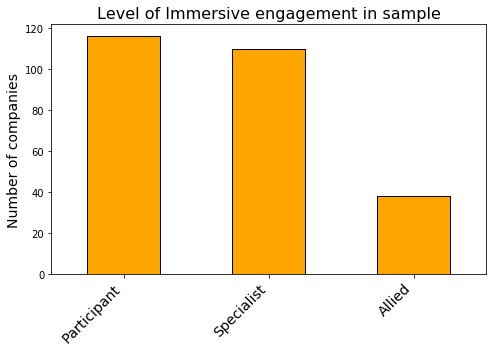

In [72]:
#Plot them

fig,ax = plt.subplots(figsize=(7,5))

boring_barchart(mtm.function.value_counts(),'Level of Immersive engagement in sample',
               'Number of companies',ax)

save_fig('immersive_engagement')

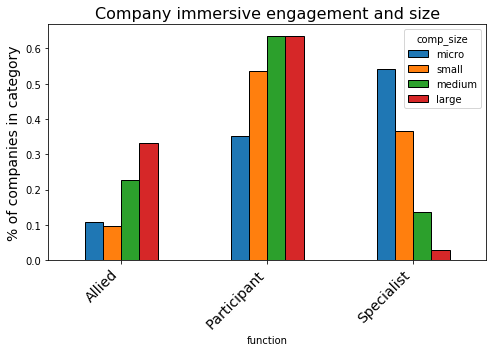

In [73]:
comp_size_order = ['micro','small','medium','large']


size_ct = pd.crosstab(mtm.comp_size,mtm.function,normalize=0).sort_values(
    'specialist',ascending=False).loc[comp_size_order]


fig,ax = plt.subplots(figsize=(7,5))

boring_crosstab(size_ct.T,'Company immersive engagement and size','% of companies in category',ax=ax)

save_fig('engagement_size')


In [74]:
#What is the large company here?
mtm.loc[(mtm.function=='specialist') & (mtm.comp_size=='large')]

,id,orgname,q2_3_postcode,q2_4_email,q3_market_role_vr_techdev,q3_market_role_ar_techdev,q3_market_role_other_ie_techdev,q3_market_role_vr_content,q3_market_role_ar_content,q3_market_role_other_ie_content,...,ttwa,gor,ttwa_name,reg_nat,domain,function,comp_size,classification,employment_est,turnover_est
265,3624802,HTC Vive ...,SL11YP,paul_brown@htc.com ...,Yes,No,No,Yes,No,No,...,NaN,NaN,NaN,NaN,htc.com,specialist,large,developer,251.0,NaN


/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


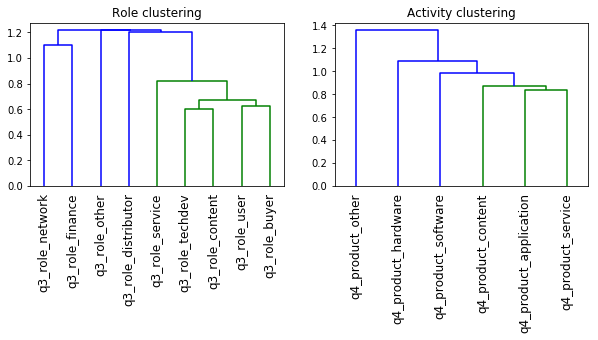

In [75]:
#Now we need to allocate companies to their role
#We use the product variable, which tells what kind of activity a company focuses on
role = mtm.loc[:,['q3_role_' in x for x in mtm.columns]].applymap(lambda x: 0 if x =='No' else 1 if type(x)==str else x)
product= mtm.loc[:,['q4' in x for x in mtm.columns]].applymap(lambda x: 0 if x =='No' else 1 if type(x)==str else x)

fig,ax=plt.subplots(ncols=2,figsize=(10,3))

draw_dendrogram(role.dropna().T,'jaccard',ax=ax[0],title='Role clustering')
draw_dendrogram(product.dropna().T,'jaccard',ax=ax[1],title='Activity clustering')

In [76]:

#Number of companies with more than one role
np.sum(role.sum(axis=1)>1)/len(role)
#np.sum(product.sum(axis=1)>1)/len(role)

0.8447653429602888

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype float64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


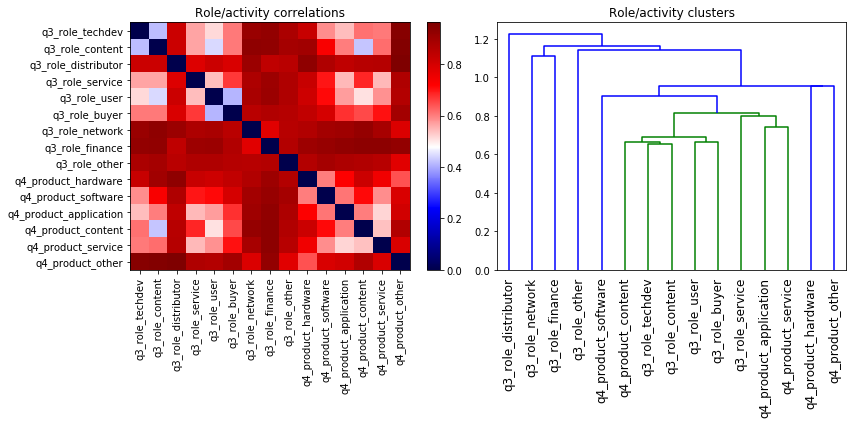

In [77]:
fig,ax=plt.subplots(figsize=(12,6),ncols=2)

combined_roles = pd.concat([role,product],axis=1)

draw_heatmap(combined_roles.T,'jaccard',ax=ax[0],title='Role/activity correlations')
draw_dendrogram(combined_roles.T,'jaccard',ax=ax[1],title='Role/activity clusters')

plt.tight_layout()

save_fig('clustering')

In [78]:
#We use answers to 5 to classify respondents into 
#We ignore the 'user' category because it just makes the data too messy

#These are developers of technology or software
dev = classify_orgs(combined_roles,['q4_product_software',
                             'q4_product_hardware',
                             'q3_role_techdev'
                            ],how='sum')

#These are creators of content
content = classify_orgs(combined_roles,['q4_product_content',
                                 'q3_role_content',
                                        #'q3_role_techdev'
                                 #'q4_product_application'
                                ],how='sum')

#These apply Immersive tech.
applier = classify_orgs(combined_roles,['q3_role_service','q4_product_service',
                     'q4_product_application'],how='sum')

#These enable the use of immersive technology by providing access to finance,distribution, services etc
enabler = classify_orgs(combined_roles,['q3_role_network','q3_role_service',
                     'q3_role_finance',
                     'q3_role_distributor'],how='sum')

#These buy immersive tech
buyer = classify_orgs(combined_roles,['q3_role_buyer',
                           ],how='sum')


mtm['classification'] = pd.DataFrame({'creator':content,'developer':dev,'enabler':enabler,'buyer':buyer,
                                     'applier':applier}).idxmax(axis=1)

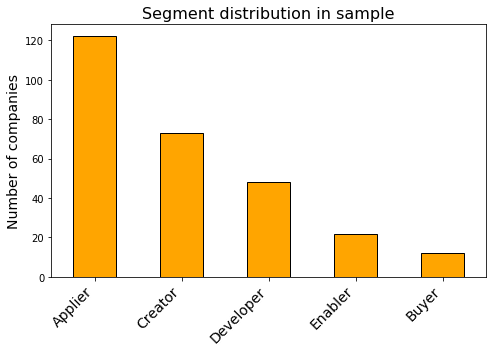

In [79]:
#Plot them

fig,ax = plt.subplots(figsize=(7,5))

boring_barchart(mtm.classification.value_counts(),'Segment distribution in sample',
               'Number of companies',ax)

save_fig('company_segment')

In [80]:
joined = pd.merge(glai,mtm,left_on='domain',right_on='domain',how='inner')

for x in set(mtm['classification']):
    print(x)
    print('\n')
    
    data = joined.loc[joined.classification==x,'Description']
    
    for x in data[-5:]:
        print(x[:250])
        print('\n')

buyer


For more than a century, Babcock has been trusted to deliver bespoke, highly-skilled engineering support.

Underpinned by a deep understanding of technology integration, infrastructure management, and specialist training, we help customers around the


Goldsmiths, University of London, is a public research university in London, England, specialising in the arts, design, humanities, and social sciences. It is a constituent college of the University of London. It was founded in 1891 as Goldsmiths' Te


McAvoy provides quality solutions to clients using 
off-site modular construction technology.


The McLaren Group is a British conglomerate based in Woking, Surrey, United Kingdom. Founded by Ron Dennis shortly after his acquisition of the McLaren Formula One team in 1981, it was originally named the TAG McLaren Group due to a partnership with 


Queen Mary University of London is a public research university in London, England, and a constituent college of the federal University o

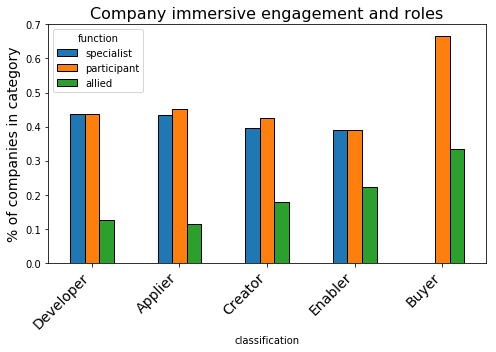

In [81]:
fig,ax = plt.subplots(figsize=(7,5))

role_spec_ct = pd.crosstab(
    mtm['classification'],mtm['function'],normalize=0).sort_values(
    'specialist',ascending=False)[['specialist','participant','allied']]


boring_crosstab(role_spec_ct,'Company immersive engagement and roles','% of companies in category',ax=ax)

save_fig('role_engagement')

In [82]:
#Extract the role order - we can use this in future charts
role_order = pd.crosstab(
    mtm['classification'],mtm['function'],normalize=0).sort_values(
    'specialist',ascending=False).index

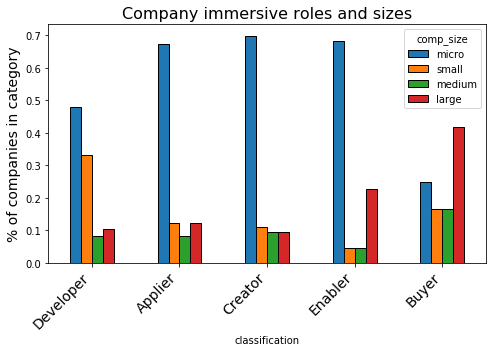

In [83]:
#Roles and sizes

fig,ax = plt.subplots(figsize=(7,5))

role_size_ct = pd.crosstab(
    mtm['classification'],mtm['comp_size'],normalize=0).loc[role_order,comp_size_order]

boring_crosstab(role_size_ct,'Company immersive roles and sizes','% of companies in category',ax=ax)

save_fig('role_size')

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


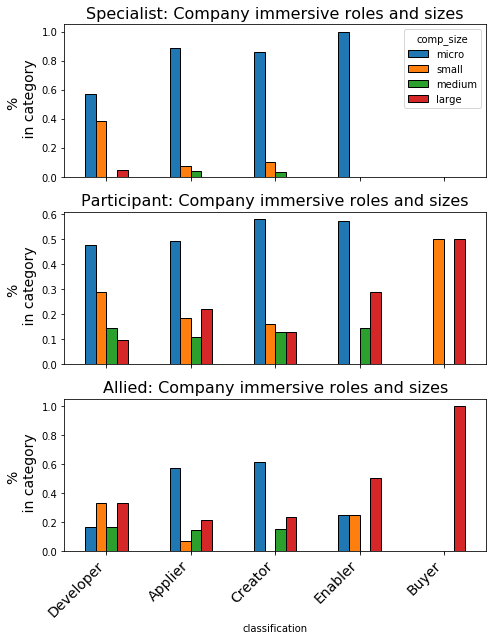

In [84]:
fig,ax = plt.subplots(figsize=(7,9),nrows=3,sharex=True)

for num,x in enumerate(['specialist','participant','allied']):
    data = mtm.loc[mtm.function==x]
    
    role_size_ct_tmp = pd.crosstab(
        data['classification'],
        data['comp_size'],normalize=0).loc[role_order,comp_size_order]

    boring_crosstab(role_size_ct_tmp,'{comp_type}: Company immersive roles and sizes'.format(comp_type=x.capitalize()),
                    '% \n in category',ax=ax[num])
    
    if num>0:
        ax[num].legend().set_visible(False)
    
plt.tight_layout()

save_fig('role_size_engagement')

## 2. Economic impact

**Steps**
* Produce a modelling dataset
* Model size and level of immersive engagement
* Generate mid-point estimates for turnover and employment taking into account the distribution of survey responses
* Here we should replace these estimates with the real data if those data are available
* Estimate results

**Observation**
* For the purposes of estimation it is a good idea to run the analysis multiple times and average. What would this look like? Just create a pipeline that trains the models 500 times, generates a prediction and its average?
* It also chooses the most likely prediction for each variable



In [85]:
#Load all the sklearn packages

from sklearn.linear_model import LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 

import string as st
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer, PunktSentenceTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer

#Functions

def comp_sentence(sentence):
    '''
    Takes a sentence and pre-processes it.
    The output is the sentence as a bag of words
    
    '''
    #Remove numbers
    text_no_numbers = re.sub('|'.join([x for x in st.digits]),'',sentence)
    
    #Tokenise
    text_punctuation = tokenizer.tokenize(text_no_numbers)
    
    #Lowercase
    text_lowered = [token.lower() for token in text_punctuation]
        
    #Remove stop words, single letters
    text_stopped = [w for w in text_lowered if w not in stop_words and
                   len(w)>1]
    
    #Stem
    #text_stemmed = [stemmer.stem(w) for w in text_stopped]
    return(text_stopped)
    
    #Output
    
#These are some of the functions used in the comp_sentence (in case I need to use it later)

#Stop words to remove
stop_words = set(stopwords.words("english"))

#Lemmatise
lemmatizer = WordNetLemmatizer()

#Punctu
punctuation = set(st.punctuation) 
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
snowball = SnowballStemmer("english")


In [129]:
#Load economic data
econ_data = pd.read_csv(proc_data+'/immerse_data_predicted_v2.csv')

In [130]:
#Extract incorporation year and age
econ_data['inc_year'] = [int(x.split("-")[0]) for x in econ_data.date_of_creation]
econ_data['age'] = [2018-int(x.split("-")[0]) for x in econ_data.date_of_creation]

In [131]:
#Identify meta-variables
meta_variables = ['index','Company Name','Organization ID','Description','Sector','Sub-sector',
                  '#People','#PeopleWithRole','#PeopleWithBio','#JobListing','#OutNetwork',
                 '#InNetwork','#SourcePages','Website','age','gor','ttwa_name','inc_year']

#Subset economic data with right variable
econ_data = econ_data.loc[:,meta_variables].drop_duplicates('Website').reset_index(drop=True)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [89]:
#Tokenise and process descriptions for some simple NLP analysis
tokens = [comp_sentence(x) if type(x)==str else [] for x in econ_data.Description]

#Focus on the top 40 tokens
top_tokens = pd.Series([x for el in tokens for x in el]).value_counts().sort_values(ascending=False)

#Get the top 40 tokens and turn them into counters
tokens_counted = [{w:np.sum([x==w for x in t]) for w in set(t) if w in top_tokens.index[:40]} for t in tokens]

tokens_counted_df = pd.DataFrame(tokens_counted).fillna(0)

econ_data = pd.concat([econ_data,tokens_counted_df],axis=1)


#Match on web domain and remove duplicated
training_set =pd.merge(econ_data,mtm.loc[:,['comp_size','comp_size_turnover','q16_employees','q21_immersive_turnover',
                                            'q19_turnover','domain','orgname','function']],
                       left_on='Website',
                       right_on='domain').drop_duplicates('domain')

training_set.shape

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:17: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(116, 66)

In [90]:
#Create turnover categories
#training_set.turnover_cats = 

turnover_size_lookup = {
    'Under Â£50k':'micro',
    'Between Â£100k and Â£500k':'micro',
    'Between Â£10m and Â£25m':'medium',
    'Between Â£1m and Â£5m':'small',
    'Between Â£500k and Â£1m':'micro',
    'Between Â£5m and Â£10m':'small',
    'Over Â£25m':'large',
    'Pre-revenue':'None',
    'Between Â£50k and Â£100k':'micro',
    'Prefer not to say':np.nan,
    np.nan:np.nan   
}

training_set['comp_size_turnover'] = pd.Series([turnover_size_lookup[x] for x in training_set.q19_turnover])

### Automate modelling

Create a class that takes the predictors and the targets and...

1. Trains models on the training data. This involves:

* Fitting an employment model
* Fitting a turnover model (using employment as a predictor)
* Fitting an engagement model

2. Produces estimates of employment and turnover

While doing this, replaces estimates for variables where we obtained data from FAME.

3. Generates estimates of employment and turnover in the specialist and participant classes.

We do the above 500 times and export averages.

We also export the most voted class for the variables above and use that during the rest of the analysis





In [ ]:
class modelImmersiveSize():
    '''
    This class does the following things:
    * Takes the training set, the complete dataset and actual data for larger companies
    * It trains a model on the complete dataset and uses it to predict labels in the complete dataset
    * It replaces data for those companies we identified in FAME
    * Does all the above 500 times and returns average estimates for employment and turnover in specialist and
    participating classes.
    * It returns the most probable label for each company
    
    '''
    
    def __init__(self, training_set,all_set,fame_data):
        '''
        Initialises the data with the input variables
        
        '''
        
        self.training = training_set
        self.all = all_set
        self.fame_data = fame_data
        
    
    def predict_variables(self,num_iterations):
        '''
        
        Trains and predicts the model a num_iterations of times.
        Returns a vector with predicted employment and turnover for all company types and
        a df with the class with the most predictions
        
        '''
        
        #Stages
        #1. Predict employment
        #2. Predict turnover (need to think if / how I include predicted employment as a predictor here)
        #3. Predict engagement
        #4. Use all this to generate predicted targets and estimates which are appended to a container
        #5. Return summaries and the values used later
        
        
        
        
        

In [124]:
def predict_financial(training_set,target,all_data):
    '''
    Predicts a financial *target* for the dataset. We use a logistic regression, which was the best performing model
    in the initial exploration
    
    #This should work equally well for employment, turnover and engagement
    
    '''
    
    #Pre-process features and targets
    X,y,test,var_names,org_ids,actual_empl = preprocessing_w_tokens(training_set,target,econ_data) 
    
    #Train model - would need to check what's the right scoring variable here
    log_reg = OneVsRestClassifier(LogisticRegressionCV(cv=3,multi_class='ovr',
                                                   scoring='accuracy'))
    #Do cross validation
    lr_cv = cross_val_score(log_reg,X=X,y=y,cv=3)
    
    #Predict
    predicted = pd.DataFrame(log_reg.fit(X,y).predict_proba(test),columns=var_names,
                             index=org_ids)
    
    #Return
    return(predicted)

### Model 1: employment

In [29]:
def preprocessing_num(training_df,target,all_set):
    '''
    Function that returns outputs, features and test sets for our employment and turnover predictions
    
    
    '''
    
    #Create target
    empl_output = pd.get_dummies(training_df[target])

    #Predictors
    preds = pd.concat([training_df.loc[:,['#' in x for x in training_df.columns]],
                       pd.get_dummies(training_df.Sector),
                       pd.get_dummies(training_df.gor),training_df.age],axis=1)
    
    #Get a dataset with predictors for the rest of the data
    
    my_vars = ['#' in x for x in all_set.columns]

    
    test = pd.concat([all_set.loc[:,my_vars],
                  pd.get_dummies(all_set.Sector),
                      pd.get_dummies(all_set.gor),all_set.age,
                     all_set['Organization ID']],axis=1)

    #Remove from the test set the predictor variabnles
    test = test.loc[[x not in set(
        training_df['Organization ID']) for x in test['Organization ID']],:]

    #This returns features for the models, the targets, the test set for prediction, the variables
    #for labelling prediction outputs and the training actuals
    return([np.array(preds),np.array(empl_output),
            np.array(test[preds.columns]),
            empl_output.columns,test['Organization ID'],
            empl_output.set_index(training_set['Organization ID'])])

def preprocessing_w_tokens(training_df,target,all_set):
    '''
    Function that returns outputs, features and test sets for our employment and turnover predictions
    
    
    '''
    
    #Create target
    empl_output = pd.get_dummies(training_df[target])

    #Predictors
    preds = pd.concat([training_df.loc[:,['#' in x for x in training_df.columns]],
                       training_df.loc[:,tokens_counted_df.columns],
                       pd.get_dummies(training_df.Sector),
                      pd.get_dummies(training_df.gor),
                       training_df.age],axis=1)
    
    #Get a dataset with predictors for the rest of the data
    
    my_vars = ['#' in x for x in all_set.columns]

    
    test = pd.concat([all_set.loc[:,my_vars],
                      pd.get_dummies(all_set.Sector),
                      all_set.loc[:,tokens_counted_df.columns],
                      pd.get_dummies(all_set.gor),all_set.age,
                      all_set['Organization ID']],axis=1)

    #Remove from the test set the predictor variabnles
    test = test.loc[[x not in set(
        training_df['Organization ID']) for x in test['Organization ID']],:]

    #This returns features for the models, the targets, the test set for prediction, the variables
    #for labelling prediction outputs and the training actuals
    return([
        np.array(preds),
        np.array(empl_output),
        np.array(test[preds.columns]),
        empl_output.columns,test['Organization ID'],
        empl_output.set_index(training_set['Organization ID'])])

In [30]:
X_emp,y_emp,test,var_names,org_ids,actual_empl = preprocessing_w_tokens(training_set,'comp_size',econ_data) 

In [31]:
#Train a couple of models (log reg and random forests)
log_reg = OneVsRestClassifier(LogisticRegressionCV(cv=3,multi_class='ovr',
                                                   scoring='accuracy'))
rf = OneVsRestClassifier(RandomForestClassifier())
nb = OneVsRestClassifier(GaussianNB())

#Score
lr_cv = cross_val_score(log_reg,X=X_emp,y=y_emp,cv=3)
rf_cv = cross_val_score(rf,X=X_emp,y=y_emp,cv=3)
nb_cv = cross_val_score(nb,X=X_emp,y=y_emp,cv=3)

In [32]:
print(np.mean(lr_cv))
print(np.mean(rf_cv))
print(np.mean(nb_cv))

0.5605038236617185
0.4568151147098516
0.31781376518218624


In [33]:
#Predict labels for the rest of the data
predicted_empl = pd.DataFrame(log_reg.fit(X_emp,y_emp).predict_proba(test),columns=var_names,
                             index=org_ids)

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [34]:
all_empl = pd.concat([predicted_empl,actual_empl],axis=0)

### Model 2: Turnover






In [35]:
X_turn,y_turn,test,var_names,org_ids,actual_turn = preprocessing_w_tokens(training_set,'comp_size_turnover',econ_data) 


#Train a couple of models (log reg and random forests)
log_reg = OneVsRestClassifier(LogisticRegressionCV(cv=3,multi_class='ovr',scoring='accuracy'))
rf = OneVsRestClassifier(RandomForestClassifier())
nb = OneVsRestClassifier(GaussianNB())

#Score
lr_cv = cross_val_score(log_reg,X=X_turn,y=y_turn,cv=3)
rf_cv = cross_val_score(rf,X=X_turn,y=y_turn,cv=3)
nb_cv = cross_val_score(nb,X=X_turn,y=y_turn,cv=3)

In [36]:
print(np.mean(lr_cv))
print(np.mean(rf_cv))
print(np.mean(nb_cv))

0.20715249662618082
0.2424651372019793
0.11201079622132253


In [37]:
#Predict labels for the rest of the data
predicted_turn = pd.DataFrame(log_reg.fit(X_turn,y_turn).predict_proba(test),columns=var_names,
                             index=org_ids)

#Turnover
all_turn = pd.concat([predicted_turn,actual_turn],axis=0)


/usr/local/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


### Model 3: immersive engagement

In [38]:
X_eng,y_eng,test,var_names,org_ids,actual_eng = preprocessing_w_tokens(
    training_set,'function',econ_data) 

In [39]:
#Train a couple of models (log reg and random forests)
log_reg = OneVsRestClassifier(LogisticRegressionCV(
    cv=3,multi_class='ovr',scoring='accuracy'))
rf = OneVsRestClassifier(RandomForestClassifier())

#Fit
lr_cv = cross_val_score(log_reg,X=X_eng,y=y_eng,cv=3)
rf_cv = cross_val_score(rf,X=X_eng,y=y_eng,cv=3)

In [40]:
print(np.mean(lr_cv))
print(np.mean(rf_cv))

0.3544759334233018
0.3108412055780477


In [41]:
#Predict labels for the rest of the data
predicted_eng = pd.DataFrame(log_reg.fit(X_eng,y_eng).predict_proba(test),columns=var_names,
                             index=org_ids)

#Turnover
all_eng = pd.concat([predicted_eng,actual_eng],axis=0)

### Combine everything

In [42]:
all_predictions = pd.concat([all_empl.idxmax(axis=1),all_turn.idxmax(axis=1),all_eng.idxmax(axis=1)],axis=1)
all_predictions.columns = ['employment','turnover','engagement']
pd.crosstab(all_predictions['employment'],all_predictions['turnover'],normalize=0)


turnover,None,large,medium,micro,small
employment,,,,,
large,0.129771,0.175573,0.007634,0.496183,0.190840
medium,0.185185,0.222222,0.148148,0.370370,0.074074
micro,0.144962,0.036535,0.002946,0.703595,0.111962
small,0.190476,0.000000,0.119048,0.595238,0.095238


In [57]:
pd.crosstab(all_predictions['employment'],all_predictions['engagement'])

engagement,allied,participant,specialist
employment,,,
large,36,93,2
medium,9,18,0
micro,32,612,1053
small,4,30,8


### Create employment midpoint

In [58]:
#Create a size lookup:
size_lookup = {'0':'micro','1-2':'micro','3-5':'micro','6-10':'micro','11-25':'small','26-50':'small',
               '51-100':'medium','101-250':'medium','251+':'large'}

#Match them
emp_distr = pd.concat([mtm.q16_employees,pd.Series([size_lookup[x] for x in mtm.q16_employees],
                                                  name='sizeband')],axis=1)

#NB we are interested in workers-owners
emp_distr['q16_employees'] = ['1' if x=='0' else x for x in emp_distr.q16_employees]

In [59]:
#We want to calculate a midpoint estimate based on a weighted sum of the
#survey responses

#This converts the strings in the survey responses into mids
emp_distr['mid'] = [np.mean(
    [int(x) for x in re.sub('\+|\-',' ',interval).split(" ") if x!='']) for interval in emp_distr.q16_employees]


#Now we want to take into account the distribution of responses in each group to calculate estimates
emp_distr_estimate = pd.concat([emp_distr.groupby(['sizeband','q16_employees'])['mid'].mean(),
                                emp_distr.groupby(['sizeband','q16_employees']).count(
                                ).groupby(level=0).apply(lambda x:x/x.sum())],axis=1)


#Rename columns
emp_distr_estimate.columns = ['mid','weight']

#Get the weighted value
emp_distr_estimate['weighted_value'] = emp_distr_estimate['mid']*emp_distr_estimate['weight']

#Here it is
emp_weighted_estimate = emp_distr_estimate.groupby(level=0)['weighted_value'].sum()

#Create a dict lookup
emp_weighted_dict = emp_weighted_estimate.to_dict()

emp_weighted_dict

{'large': 251.0,
 'medium': 129.66666666666666,
 'micro': 3.0229885057471266,
 'small': 25.142857142857146}

### Create turnover midpoint

In [60]:
turnover_values_lookup = {'Between Â£100k and Â£500k':[100000,500000],
                        'Between Â£10m and Â£25m':[10000000,25000000],
                        'Between Â£1m and Â£5m':[1000000,5000000],
                        'Between Â£500k and Â£1m':[500000,1000000],
                        'Between Â£50k and Â£100k':[50000,100000],
                        'Between Â£5m and Â£10m':[5000000,10000000],
                        'Over Â£25m':[25000000],
                        'Pre-revenue':[0],
                        'Prefer not to say':np.nan,
                        np.nan:np.nan,
                        'Under Â£50k':[0,50000]}

In [61]:
#Create a size lookup:

#Match them
turn_distr = pd.concat([mtm.q19_turnover,pd.Series([turnover_size_lookup[x] for x in mtm.q19_turnover],
                                                  name='turnover_sizeband')],axis=1)

#We want to calculate a midpoint estimate based on a weighted sum of the
#survey responses

#This converts the strings in the survey responses into mids
turn_distr['mid'] = [np.mean(turnover_values_lookup[x]) for x in turn_distr.q19_turnover]

In [62]:
#Now we want to take into account the distribution of responses in each group to calculate estimates
turn_distr_estimate = pd.concat([turn_distr.groupby(['turnover_sizeband','q19_turnover'])['mid'].mean(),
                                turn_distr.groupby(['turnover_sizeband','q19_turnover']).count(
                                ).groupby(level=0).apply(lambda x:x/x.sum())],axis=1)


#Rename columns
turn_distr_estimate.columns = ['mid','weight']

#Get the weighted value
turn_distr_estimate['weighted_value'] = turn_distr_estimate['mid']*turn_distr_estimate['weight']

#Here it is
turn_weighted_estimate = turn_distr_estimate.groupby(level=0)['weighted_value'].sum()

#Create a dict lookup
turn_weighted_dict = turn_weighted_estimate.to_dict()

turn_weighted_dict

{'None': 0.0,
 'large': 25000000.0,
 'medium': 17500000.0,
 'micro': 260338.34586466168,
 'small': 3290322.580645161}

In [63]:
all_predictions['emp_estimate'] = [emp_weighted_dict[x] for x in all_predictions.employment]
all_predictions['turn_estimate'] = [turn_weighted_dict[x] for x in all_predictions.turnover]


all_predictions.loc[[x in 'specialist' for x in all_predictions.engagement],'turn_estimate'].sum()

1267033349.502789

In [64]:
all_predictions.loc[[x in 'specialist' for x in all_predictions.engagement],'emp_estimate'].sum()

3886.3497536945815

In [65]:
large_esp = all_predictions.loc[(all_predictions.turnover=='large') &
                               (all_predictions.engagement=='specialist'),:].index

econ_data.set_index('Organization ID').loc[large_esp]

,index,Company Name,Description,Sector,Sub-sector,#People,#PeopleWithRole,#PeopleWithBio,#JobListing,#OutNetwork,...,uk,university,us,video,virtual,vr,work,working,world,years
Organization ID,,,,,,,,,,,,,,,,,,,,,
494905.0,NaN,Active Internet Marketing (UK),"As an established SEO company, Active Internet...",Professional Services,Marketing and Advertising,10.0,4.0,0.0,0.0,34.0,...,2.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2715203.0,NaN,Deceptive Games,Deceptive Games is a video games development a...,Technology,Computer Games,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0
94537.0,NaN,Grand Central Sound Studios,"For the past two decades, GCRS has trail blaze...",Media and Arts,Media Production,5.0,4.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0
103450.0,NaN,Haemair,About Us\nHaemair was founded in 2005 by engin...,Healthcare and Scientific,Medical Devices,7.0,0.0,5.0,0.0,6.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
110734.0,NaN,Holts,Mr Holt was one of few allowed to enter China ...,Consumer Goods and Services,Luxury Goods and Jewellery,9.0,9.0,4.0,0.0,10.0,...,2.0,0.0,3.0,0.0,1.0,0.0,3.0,0.0,4.0,1.0
116485.0,NaN,IKinema,IKinema sells products that dramatically impro...,Technology,Computer Software,1.0,1.0,0.0,0.0,80.0,...,2.0,0.0,0.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0
120231.0,NaN,Interference Pattern,"Interference Pattern, founded in 2008, is a hi...",Media and Arts,Animation,30.0,4.0,2.0,1.0,31.0,...,0.0,2.0,3.0,2.0,0.0,4.0,3.0,0.0,1.0,0.0
698417.0,NaN,John Hunt Photography,PAST John Hunt Photography has been establishe...,Media and Arts,Photography,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0
2383318.0,NaN,Modux,"Modux was founded in 2008, initially deliverin...",NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [126]:
#Sanity check. What are the employment estimates and turnover estimates based on the survey?

emp_estimate_lookup = {x:y for x,y in zip(emp_distr_estimate.reset_index(drop=False)['q16_employees'],
                                          emp_distr_estimate['mid'])}

turn_estimate_lookup = {x:y for x,y in zip(turn_distr_estimate.reset_index(drop=False)['q19_turnover'],
                                          turn_distr_estimate['mid'])}

#What do we get from the survey
#Employment
mtm['employment_est'] = [emp_estimate_lookup[x] if x!='0' else emp_estimate_lookup['1'] for x in mtm.q16_employees]

print(mtm.loc[mtm.function=='specialist','employment_est'].sum()*9)

#Turnover
mtm['turnover_est'] = [turn_estimate_lookup[x] if 'Prefer' not in x else np.nan for x in mtm.q19_turnover]

print(mtm.loc[mtm.function=='specialist','turnover_est'].sum()*9)


12100.5
857700000.0


#### Other measurement

In [53]:
# What are the company ages by type?

#NB we are going to keep the analyses separate. Here we focus on the Glass AI/Companies House combination

#Enrich the economic data with the predictions
econ_data_enriched = pd.concat([econ_data.set_index('Organization ID'),all_predictions],axis=1)


In [54]:
econ_data_enriched[['Company Name','turnover']].to_csv(ext_data+'/{date}_company_list.csv'.format(date=today_str))

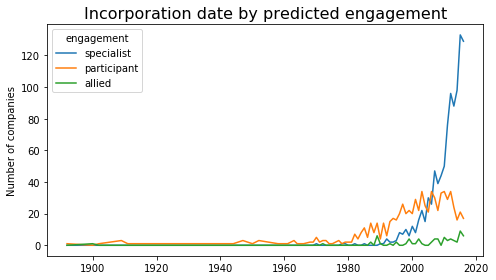

In [55]:
#We use this to sort out the levels of engagement in variables
function_order = ['specialist','participant','allied']


#Year
#Plot company ages by function
engagement_year = pd.crosstab(econ_data_enriched['inc_year'],econ_data_enriched['engagement'])


fig,ax = plt.subplots(figsize=(7,4))

engagement_year.loc[engagement_year.index<2017][function_order].plot(ax=ax)
ax.set_title('Incorporation date by predicted engagement',size=16)
ax.set_ylabel('Number of companies')
ax.set_xlabel('')

save_fig('incorporation_date')

In [56]:
#Look at the cumulative share of activity
cumulative_share = engagement_year['specialist'].cumsum()/engagement_year['specialist'].sum()
cumulative_share[-10:]

inc_year
2009    0.289746
2010    0.336783
2011    0.408278
2012    0.498589
2013    0.581373
2014    0.673565
2015    0.798683
2016    0.920038
2017    0.992474
2018    1.000000
Name: specialist, dtype: float64

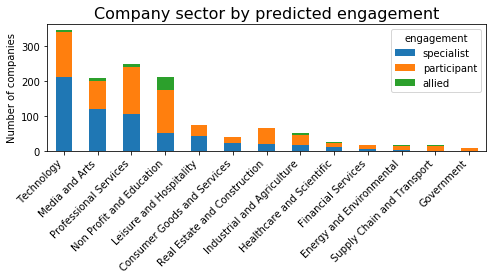

In [63]:
#Plot company functions by sector

sector_function = pd.crosstab(econ_data_enriched.Sector,econ_data_enriched.engagement)
sector_function.sort_values('specialist',ascending=False,inplace=True)

fig,ax = plt.subplots(figsize=(7,4))

sector_function[function_order].plot.bar(stacked=True,ax=ax)
ax.set_title('Company sector by predicted engagement',size=16)
ax.set_ylabel('Number of companies')
ax.set_xticklabels(sector_function.index,rotation=45,ha='right')
ax.set_xlabel('')

save_fig('sector_engagement')



## 3. Mapping

Here we want to show:
* A map of activity across the UK (again by company types)
* A map of diffusion of activity (eg years when a TTWA reached more than 5 companies incorporated)
* A map of activity by sector (with LQs)



In [1447]:
import geopandas as gp

uk_map = gp.read_file(ext_data+'/StatPlanet_UK/map/map.shp')

ttwa_shp = gp.read_file(ext_data+'/Travel_to_Work_Areas_(UK)_2011_boundaries_(generalised_clipped)_V3 2/TTWA_2011_UK_BGC_V3.shp')

In [1477]:
def immersive_map(df,ax,my_cmap='YlOrRd'):
    '''
    Creates a choropleth for a sector and variable. Considers a specialisation variable to 
    colour and an activity variable to threshold
    
    '''
    
    #Map
    map_data = df.loc[df.sector==sector,:]
    
    #Select the data to map if there is specialisation and the variable is above a certain threshold
    map_data['processed'] = [x if x>1 and y> map_data[act_var].quantile(threshold) else np.nan 
                             for x,y in zip(map_data[esp_var],map_data[act_var])]
    
    #Then quantise
    map_data['processed_quantised'] = pd.qcut(map_data['processed'],
                                             q=np.arange(0,1.1,0.1),labels=False,duplicates='drop')
    
   
    #Plot map
    map_data.plot(ax=ax,color='lightgrey',
                  #edgecolor='white',linewidth=0.5
                 )
    
    
    m=map_data.dropna(axis=0,subset=['processed']).plot(ax=ax,
                  column='processed_quantised',
                  #color=['coral' if x >1 else 'steelblue' for x in map_data[variable_to_map]],
                  #legend=True,
                                                      cmap=my_cmap
                 )
    
    #Set axis off
    ax.set_xlim(0,940000)
    ax.axis('off')
    
    ax.set_title(sector,y=1.01,size=12)
    return(m)

#Functions
def create_lq_df(df,year=None):
    '''
    Takes a df with cells = activity in col in row and returns a df with cells = lq
    
    '''
    
    area_activity = df.sum(axis=0)
    area_shares = area_activity/area_activity.sum()
    
    lqs = df.apply(lambda x: (x/x.sum())/area_shares, axis=1)
    
    if year!=None:
        lqs['year'] = year
    
    return(lqs)

def filter_lq(df,variable,thres=90):
    '''
    This is to filter LQs based on the absolute value
    
    '''
    
    threshold = np.percentile(df[variable],thres)
    #print(threshold)
    
    filtered_var = [x if y>threshold else np.nan for x,y in zip(df[variable+'_lq'],df[variable])]
    
    return(filtered_var)

In [1478]:
# What data are we going to work with?

#Number of immersive companies per TTWA
ttwa_immersive_funct = pd.crosstab(econ_data_enriched.ttwa_name,econ_data_enriched.engagement)
ttwa_immersive_funct = ttwa_immersive_funct[['pseudo' not in x for x in ttwa_immersive_funct.index]]

ttwa_immersive_total = ttwa_immersive_funct.sum(axis=1)
ttwa_immersive_total.name='immersive_total'

#IDBR totals
idbr_norm = idbr.loc[idbr.year=='2015_2016',
                     ['ttwa_name','not_creative','All creative industries']].set_index('ttwa_name').sum(axis=1)

#Specialisation index
ttwa_specialisation_function = create_lq_df(
    pd.concat([ttwa_immersive_funct,idbr_norm],axis=1)).fillna(0)

ttwa_specialisation_function.columns = ['allied_lq','participant_lq','specialist_lq','other_lq']

#All immersive specialisation index
ttwa_specialisation_immersive = create_lq_df(
    pd.concat([ttwa_immersive_funct.sum(axis=1),idbr_norm],axis=1)).fillna(0)

ttwa_specialisation_immersive.columns = ['immersive_total_lq','other_lq_2']

#ttwa_specialisation_immersive.sort_values('immersive_lq',ascending=False)

#TTWA polygons
ttwa_poly = pd.concat([ttwa_shp.set_index('TTWA11NM'),ttwa_immersive_funct,ttwa_immersive_total,
                     ttwa_specialisation_function,ttwa_specialisation_immersive],axis=1).fillna(0)

ttwa_poly = ttwa_poly.loc[:,['other' not in x for x in ttwa_poly.columns]]

#TTWA poly with thresholds
ttwa_poly_filtered = ttwa_poly.copy()

for x in ['immersive_total','specialist','participant','allied']:
    #print(x)
    ttwa_poly_filtered[x+'_lq']=filter_lq(ttwa_poly_filtered,x)




In [1566]:
#I want a map of deciles

def make_map(poly_df,variable,title,ax,decile=False,rank=False,cmap='viridis'):
    '''
    This makes a map of activity based on deciles
    
    '''
    
    poly_df = poly_df.copy()
    
    if decile==True:
        poly_df[variable] =  pd.qcut(poly_df[variable],
                                     q=np.arange(0,1.1,0.1),labels=False,duplicates='drop')
    
    if rank==True:
        poly_df[variable]=poly_df[variable].rank()
    
    

    m=poly_df.plot(variable,ax=ax,cmap=cmap,edgecolor='lightgrey',linewidth=0.1
                   #legend=True
                  )
    
    #Set axis off
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title,size=16)
    #ax.legend(title='Decile of activity')
    
    return(ax)



def make_year_map(poly_df,variable,title,ax,decile=False,rank=False,cmap='viridis'):
    '''
    This makes a map of activity based on deciles
    
    '''
    
    poly_df = poly_df.copy()
    
    if decile==True:
        poly_df[variable] =  pd.qcut(poly_df[variable],
                                     q=np.arange(0,1.1,0.1),labels=False,duplicates='drop')
    
    if rank==True:
        poly_df[variable]=poly_df[variable].rank()
    
    

    m=poly_df.plot(variable,ax=ax,cmap=cmap,edgecolor='slategrey',linewidth=0.4,vmin=0,vmax=4
                   #legend=True
                  )
    
    #Set axis off
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title,size=16)
    #ax.legend(title='Decile of activity')
    
    return(ax)

/usr/local/lib/python3.5/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


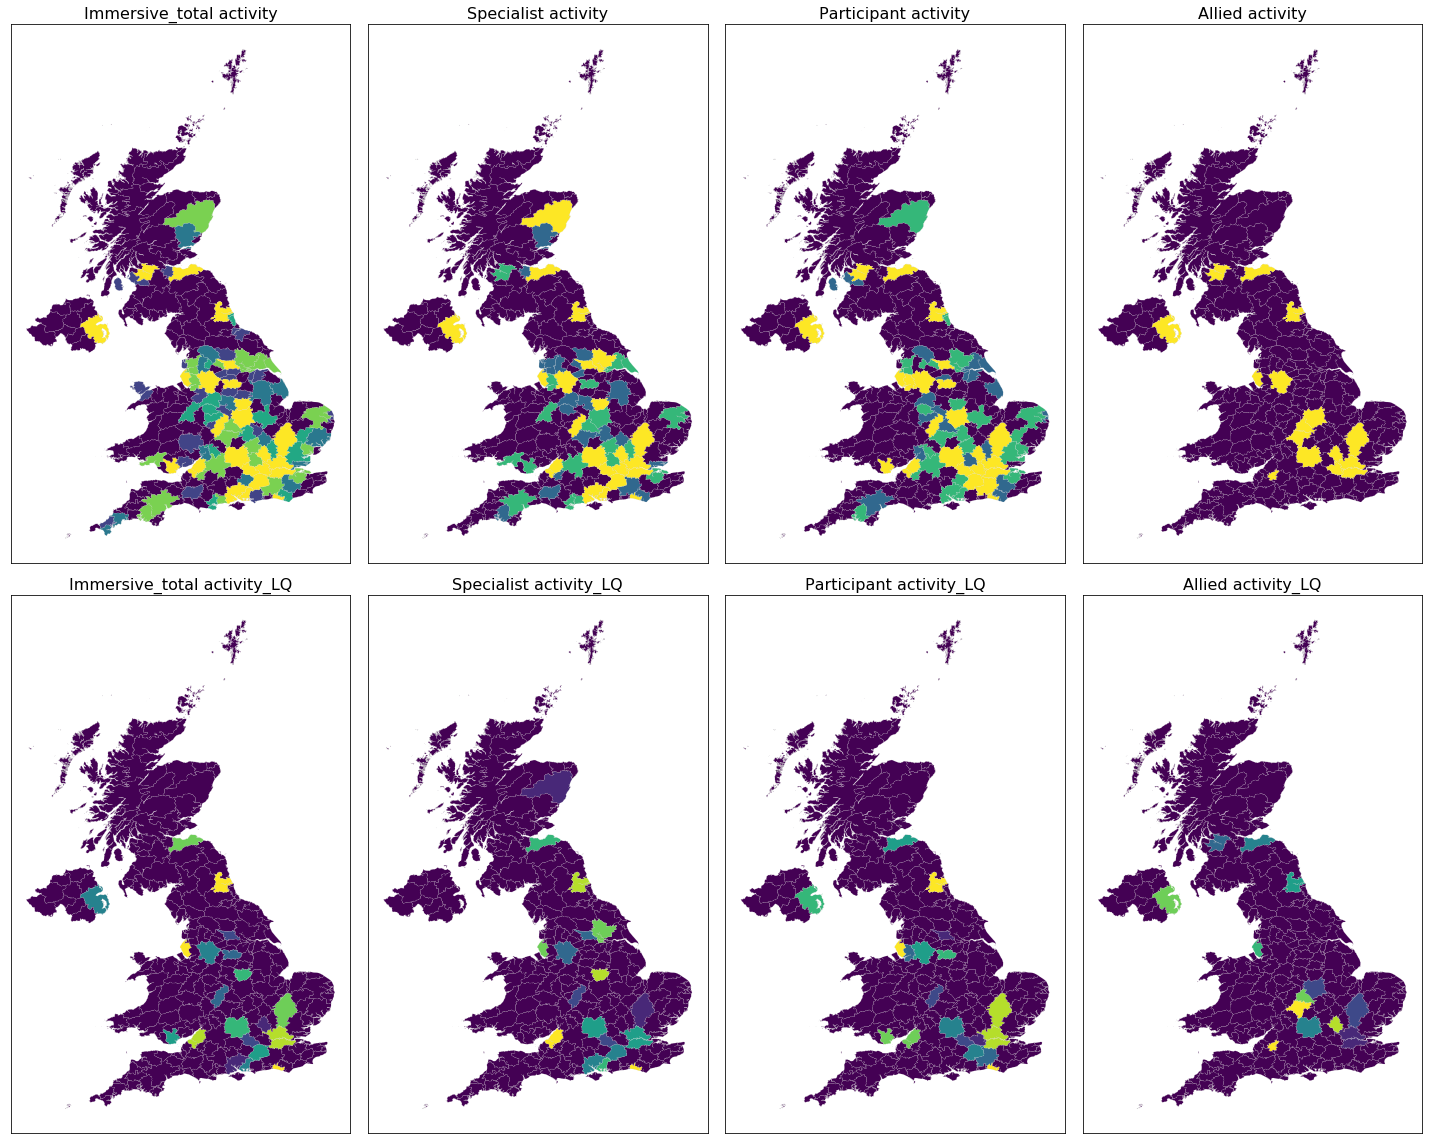

In [1567]:
fig,ax = plt.subplots(figsize=(20,16),nrows=2,ncols=4)

for num,x in enumerate(['immersive_total','specialist','participant','allied']):
    make_map(ttwa_poly,x,'{name} activity'.format(name=x.capitalize()),ax=ax[0][num],decile=True,cmap='viridis')
    #ax[num].get_legend().set_visible(False)
    make_map(ttwa_poly_filtered,x+'_lq','{name} activity_LQ'.format(name=x.capitalize()),ax=ax[1][num],decile=True,
            cmap='viridis')
    

plt.tight_layout()

plt.savefig(fig_path+'/{date}_specialisation_map.png'.format(date=today_str))


In [1568]:
#Map changes in activity over time

#Split the data into 5 periods: 2005,2010,2015,2020
#Relabel (>1, >10,>50,>100)

def get_year_activity(df,year,cat=['specialist']):
    '''
    Returns a df with number of companies in category by TTWA
    
    '''
    #Subset data by year
    subset = df.loc[(df.inc_year<year) & ([x in cat for x in df.engagement]),:]
    
    #Create the crosstab
    ttwa_counts = subset.ttwa_name.value_counts()
    
    #Relabel
    ttwa_counts = pd.Series([5 if x>100 else 4 if x>50 else 3 if x>10 else 2 if x>5 else 1 if x>0 else 0 for x in ttwa_counts],
                           index=ttwa_counts.index)
    
    ttwa_counts.name = 'year_'+str(year)
    
    return(ttwa_counts)

In [1569]:
#Year activities DF
year_activities = bpd.concat(
    [get_year_activity(econ_data_enriched,x) for x in [2000,2010,2018]],axis=1)

#Map
year_poly = pd.concat([ttwa_shp.set_index('TTWA11NM'),year_activities],axis=1).fillna(0)
year_poly = year_poly.loc[['pseudo' not in x for x in year_poly.index],:]

In [1582]:
reds = plt.cm.get_cmap('Reds')

array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. ])

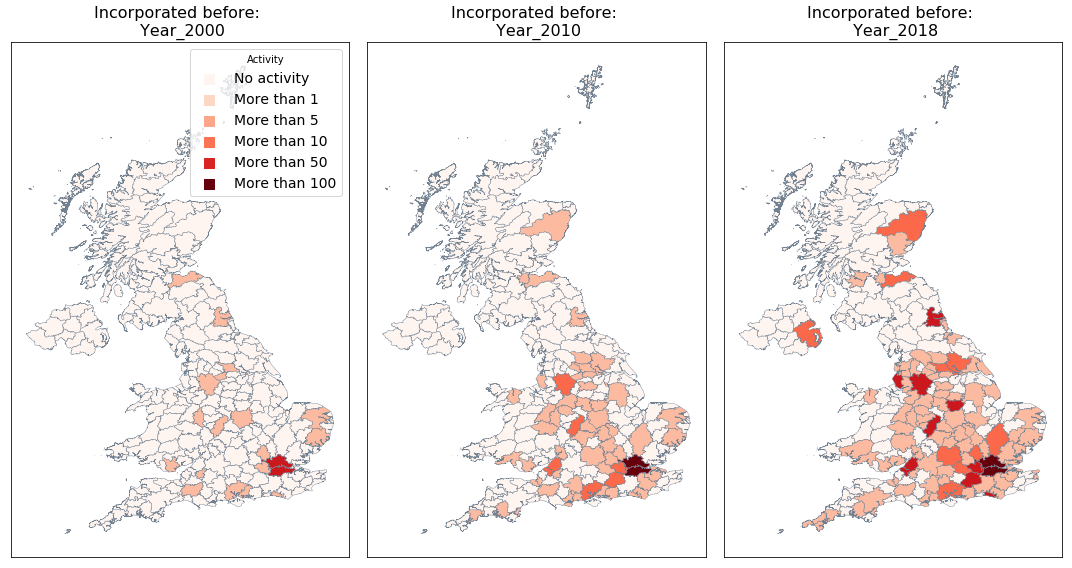

In [1596]:
fig,ax = plt.subplots(figsize=(15,8),ncols=3)

for num,x in enumerate(year_poly.columns[-3:]):
    #print(x)
    make_year_map(year_poly,x,'Incorporated before: \n {name}'.format(name=x.capitalize()),
             ax=ax[num],cmap='Reds')
    
    if num==0:
        #Custom plots
            cl1 = plt.scatter([],[],s=100, marker='s',facecolors=reds(0))
            cl2 = plt.scatter([],[],s=100, marker='s',facecolors=reds(40))
            cl3 = plt.scatter([],[],s=100, marker='s',facecolors=reds(80))
            cl4 = plt.scatter([],[],s=100, marker='s',facecolors=reds(120))
            cl5 = plt.scatter([],[],s=100, marker='s',facecolors=reds(180))
            cl6 = plt.scatter([],[],s=100, marker='s',facecolors=reds(256))

            #Add legend
            ax[num].legend((cl1,cl2,cl3,cl4,cl5,cl6),
                                ('No activity','More than 1','More than 5','More than 10','More than 50','More than 100'),
                                scatterpoints=1,
                                title='Activity',
                                #loc='upper left',
                                ncol=1,fontsize=14)


plt.tight_layout()

plt.savefig(fig_path+'/{date}_time_map.png'.format(date=today_str))

Aberdeen                          0.819724
Aberystwyth                       0.732111
Alness and Invergordon            0.000000
Andover                           0.494835
Arbroath and Montrose             1.629406
Ashford                           0.000000
Aviemore and Grantown-on-Spey     0.000000
Ayr                               0.000000
Ballymena                         0.000000
Banbury                           0.325496
Bangor and Holyhead               0.945480
Barnsley                          0.586459
Barnstaple                        0.000000
Barrow-in-Furness                 0.000000
Basingstoke                       0.427874
Bath                              1.591023
Bedford                           0.479129
Belfast                           1.321409
Berwick                           0.000000
Bideford                          0.000000
Birkenhead                        0.216330
Birmingham                        1.026516
Blackburn                         0.542129
Blackpool  

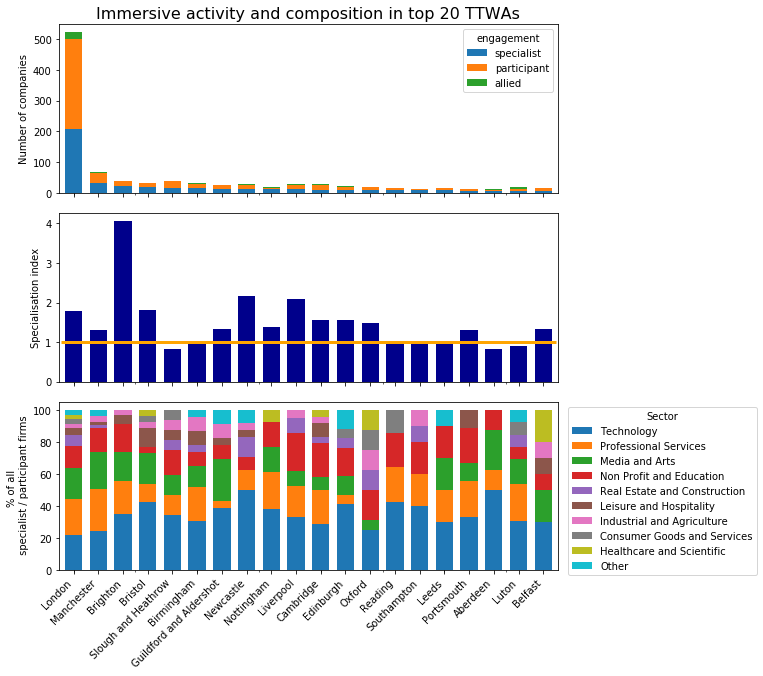

In [1672]:
#Now the other activity plots
#One with totals, specialisations and sectors

#Totals of activity
ttwa_function_distr = pd.crosstab(
    econ_data_enriched.ttwa_name,econ_data_enriched.engagement).sort_values(
    'specialist',ascending=False)[function_order]

#And we select the top 30 places
top_30_places = ttwa_function_distr.index[:20]

top_30_specialisation=ttwa_specialisation_immersive['immersive_total_lq'].loc[top_30_places]

#Sectoral distribution of activity by TTWA

ttwa_sector = pd.crosstab(econ_data_enriched.loc[[x in [
    'participant','specialist'] for x in econ_data_enriched.engagement],'ttwa_name'],
                          econ_data_enriched.loc[[x in [
    'participant','specialist'] for x in econ_data_enriched.engagement],'Sector'])

#Top 9 sectors
top_sectors = ttwa_sector.sum().sort_values(ascending=False).index[:9]

ttwa_sector['Other'] = ttwa_sector.loc[:,[x not in top_sectors for x in ttwa_sector.columns]].sum(axis=1)

top_30_sectoral = 100*ttwa_sector.loc[top_30_places,list(top_sectors)+['Other']].apply(lambda x: x/x.sum(),axis=1)

#Plot everything
#Draw figure
fig,ax = plt.subplots(figsize=(8,9.5),nrows=3,sharex=True)

#Plot the function by city
ttwa_function_distr.loc[top_30_places].plot.bar(stacked=True,ax=ax[0],width=0.7)
ax[0].set_ylabel('Number of companies')

#Plot the specialisation
top_30_specialisation.plot.bar(stacked=True,ax=ax[1],color='darkblue',width=0.7)
ax[1].set_ylabel('Specialisation index')

#Hline for Lq=1
ax[1].hlines(y=1,xmin=-0.5,xmax=19.5,color='orange',linewidth=3)

#Plot sectoral specialisations
top_30_sectoral.plot.bar(stacked=True,ax=ax[2],width=0.7)
ax[2].set_xticklabels(top_30_sectoral.index,rotation=45,ha='right')
ax[2].set_ylabel('% of all \n specialist / participant firms')

ax[2].legend(bbox_to_anchor=(1.01,1),title='Sector')
ax[2].set_xlabel('')

ax[0].set_title('Immersive activity and composition in top 20 TTWAs',size=16)

plt.tight_layout()

save_fig('activity_composition')


In [1681]:
shares_activity = 100*ttwa_immersive_totals.sort_values(ascending=False)/ttwa_immersive_totals.sum()
shares_activity[:5]

ttwa_name
London                 37.771346
Manchester              4.848046
Slough and Heathrow     2.894356
Brighton                2.821997
Bristol                 2.387844
Name: immersive_totals, dtype: float64

In [1776]:
#Change over time
only_specialists = econ_data_enriched.loc[econ_data_enriched.engagement=='specialist',:]


place_activity = pd.crosstab(only_specialists['ttwa_name'],only_specialists[
    'inc_year']).loc[top_30_places[:10]].T.cumsum()

London
195.28301886792454
Manchester
163.1578947368421
Brighton
222.22222222222223
Bristol
150.0
Slough and Heathrow
177.77777777777777
Birmingham
113.33333333333333
Guildford and Aldershot
140.0
Newcastle
185.71428571428572
Nottingham
171.42857142857142
Liverpool
220.0


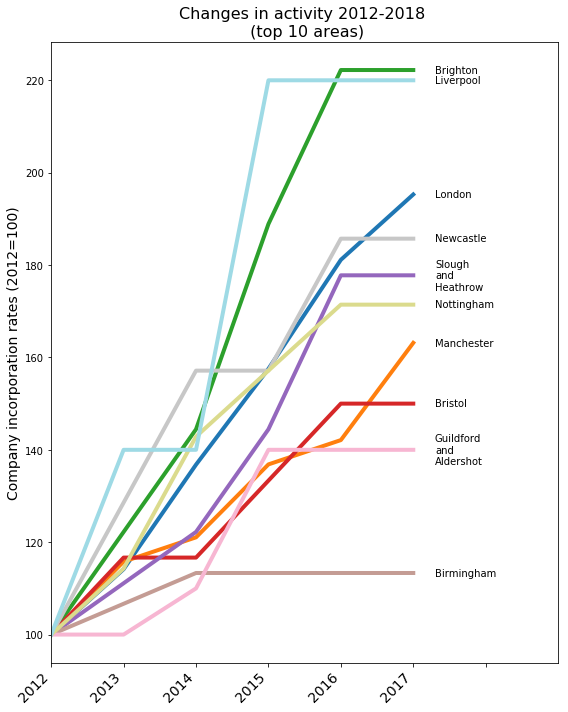

In [1785]:
fig, ax = plt.subplots(figsize=(8,10))

place_activity_normalised = place_activity.apply(lambda x: 100*x/place_activity.loc[2012],axis=1).loc[np.arange(2012,2018)]

place_activity_normalised.plot(ax=ax,linewidth=4,alpha=1,cmap='tab20',
                                                        legend=False)

for x in place_activity_normalised.columns:
    print(x)
    print(place_activity_normalised.loc[2017,x])
    ax.annotate("\n".join(x.split(' ')),xy=(2017.3,place_activity_normalised.loc[2017,x]),va='center')

ax.set_xlim(2012,2019)
ax.set_xticks(np.arange(2012,2019))
ax.set_xticklabels([x if x<2018 else '' for x in np.arange(2012,2020)],rotation=45,ha='right',size=14)

ax.set_ylabel('Company incorporation rates (2012=100)',size=14)
ax.set_xlabel('')

ax.set_title('Changes in activity 2012-2018 \n (top 10 areas)',size=16)

save_fig('changes_activity')


## 4. Drivers and barriers

Here we go back to an analysis of the survey data. We need to create a couple of functions to make this
analysis efficient

### Performance

Includes:

* Growth
* Confidence

Subset by place, company type.


In [1865]:
print(mtm.q20_growth.value_counts(normalize=True))

print('\n')
print(mtm.q22_business_confidence.value_counts(normalize=True))


Higher than twelve months ago    0.563177
The same as twelve months ago    0.332130
Lower than twelve months ago     0.104693
Name: q20_growth, dtype: float64


Very confident        0.488636
Quite confident       0.390152
Neutral               0.106061
Not very confident    0.015152
Name: q22_business_confidence, dtype: float64


87

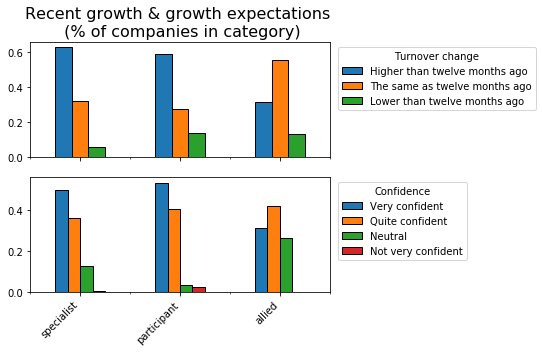

In [1852]:
#Performance 

fig, ax = plt.subplots(figsize=(5,5),sharex=True,nrows=2)


#Plot 1
growth_ct = pd.crosstab(mtm.q20_growth,mtm.function,normalize=1).T.loc[function_order].iloc[
    :,[0,2,1]].plot.bar(ax=ax[0],edgecolor=['black']*3)

#Move legend outside
ax[0].legend(bbox_to_anchor=(1.01,1),title='Turnover change')

#Plot 2 (confidence)
conf_ct = pd.crosstab(mtm.q22_business_confidence,mtm.function,normalize=1).T.loc[
    function_order].iloc[:,[3,2,0,1]].plot.bar(ax=ax[1],edgecolor=['black']*3)

ax[1].legend(bbox_to_anchor=(1.01,1),title='Confidence')

#Titles and labels
ax[0].set_title('Recent growth & growth expectations \n (% of companies in category)',size=16)

ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,ha='right')

ax[1].set_xlabel('')

save_fig('growth_expectations_engagement')

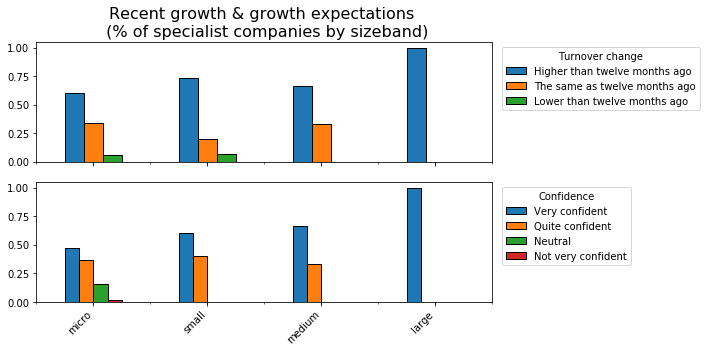

In [1858]:
#Performance by size

size_order = ['micro','small','medium','large']

mtm_spec = mtm.loc[[x in ['specialist'] for x in mtm.function],:]
#Performance 

fig, ax = plt.subplots(figsize=(7,5),sharex=True,nrows=2)


#Plot 1
growth_ct = pd.crosstab(mtm_spec.q20_growth,mtm_spec.comp_size,normalize=1).T.loc[size_order].iloc[
    :,[0,2,1]].plot.bar(ax=ax[0],edgecolor=['black']*4)

#Move legend outside
ax[0].legend(bbox_to_anchor=(1.01,1),title='Turnover change')

#Plot 2 (confidence)
conf_ct = pd.crosstab(mtm_spec.q22_business_confidence,mtm_spec.comp_size,normalize=1).T.loc[size_order].iloc[
    :,[3,2,0,1]].plot.bar(ax=ax[1],edgecolor=['black']*4)


ax[1].legend(bbox_to_anchor=(1.01,1),title='Confidence')

#Titles and labels
ax[0].set_title('Recent growth & growth expectations \n (% of specialist companies by sizeband)',size=16)

ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,ha='right')

ax[1].set_xlabel('')

save_fig('growth_expectations_size')

### Trade

Includes:

* Trade with other sectors
* International trade


In [2259]:
def process_question(survey_data,var_name,var_type='binary',var_int = 'Very important'):
    '''
    This function turns a variable into counts. 
    
    '''
    if var_type=='binary':
    
        data = survey_data.loc[:,[var_name in x for x in survey_data.columns]]
        data_bin = data.applymap(lambda x: 1 if x !='No' else 0)
        
    elif var_type=='likert':
        data = survey_data.loc[:,[var_name in x for x in survey_data.columns]]
        data_bin = data.applymap(lambda x: 1 if x==var_int else 0)
        
    
    return([data,data_bin])
    

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


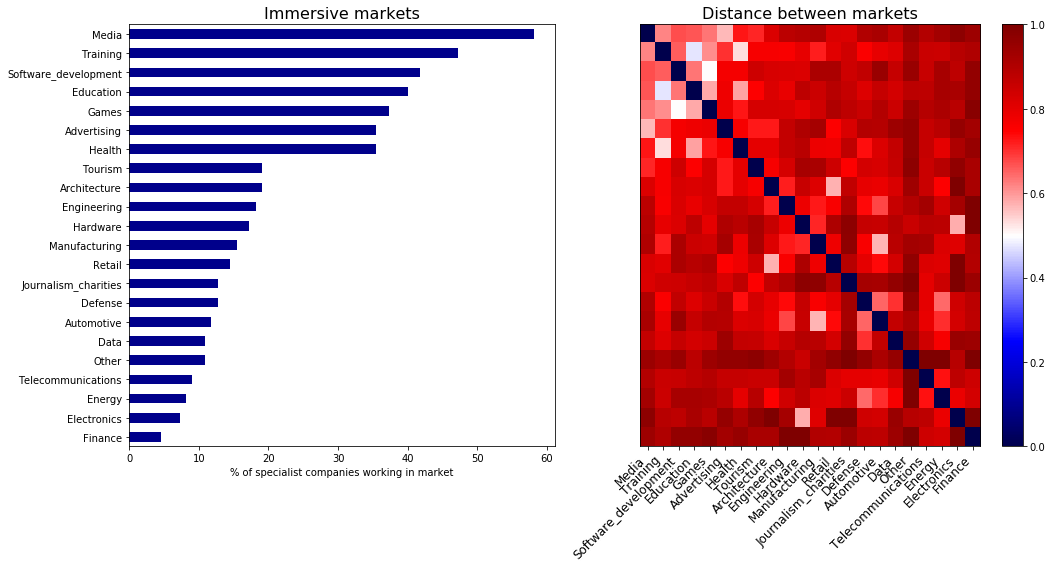

In [1962]:
#Trade with other sectors

#Process question into binary and look at the distribution
trade = process_question(mtm_spec,'q18')

#This is to normalise
tot = len(trade[1])

#Create %
spec_trade = 100*trade[1].sum().sort_values(ascending=True)/tot

#Plot
fig,ax = plt.subplots(figsize=(15,8),ncols=2)

#Create plot
spec_trade.plot.barh(color='darkblue',ax=ax[0])

#Clean labels
ax[0].set_yticklabels([x[12:].capitalize() for x in spec_trade.index])

ax[0].set_title('Immersive markets',size=16)
ax[0].set_xlabel('% of specialist companies working in market')

draw_heatmap(trade[1][spec_trade.index[::-1]].T,'jaccard',ax=ax[1],title='Market correlation')
ax[1].set_title('Distance between markets',size=16)
ax[1].get_yaxis().set_visible(False)
ax[1].set_xticklabels([x[12:].capitalize() for x in spec_trade.index[::-1]],rotation=45,ha='right',size=12)

plt.subplots_adjust(wspace=0.1)

save_fig('markets')

In [2313]:
trade_non_media = trade[1].loc[:,[all(
    name not in x for name in ['games','media','software','advertising']) for x in trade[1].columns]]

np.sum(trade_non_media.sum(axis=1)>1)/len(trade_non_media)

trade_non_media.sum().sort_values()

q18_clients_finance                  5
q18_clients_electronics              8
q18_clients_energy                   9
q18_clients_telecommunications      10
q18_clients_other                   12
q18_clients_data                    12
q18_clients_automotive              13
q18_clients_defense                 14
q18_clients_journalism_charities    14
q18_clients_retail                  16
q18_clients_manufacturing           17
q18_clients_hardware                19
q18_clients_engineering             20
q18_clients_tourism                 21
q18_clients_architecture            21
q18_clients_health                  39
q18_clients_education               44
q18_clients_training                52
dtype: int64

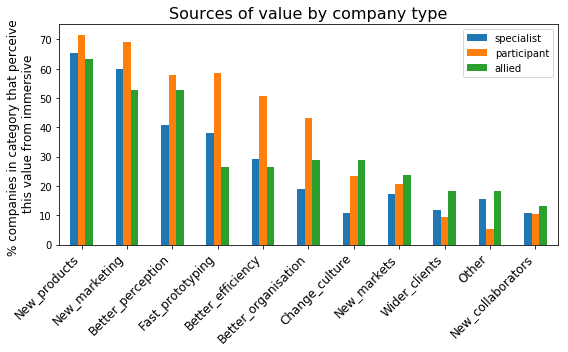

In [1995]:
#Sources of value
value_types = pd.concat([100*process_question(
    mtm.loc[mtm.function==x,:],'q7_',var_type='binary')[1].mean() for x in ['specialist',
                                                                                   'participant','allied']],axis=1)
#Add columns
value_types.columns = ['specialist','participant','allied']

#Order for plotting
value_types_ordered = value_types.sum(axis=1).sort_values(ascending=False).index

#Plot
fig, ax = plt.subplots(figsize=(8,5))

value_types.loc[value_types_ordered,:].plot.bar(ax=ax)

ax.set_xticklabels([x[9:].capitalize() for x in value_types_ordered],rotation=45,ha='right',size=12)

ax.set_title('Sources of value by company type',size=16)
ax.set_ylabel('% companies in category that perceive \n this value from immersive',size=12)

save_fig('immersive_value')



In [2012]:
#mtm_allied = mtm.loc[mtm.function=='allied',:]
spend_grow = [any('Expect to grow' in x for x in [a,b,c] if type(x)==str) for a,b,c in zip(mtm.q26_future_spend_other_ie,
                                                                          mtm.q26_future_spend_ar,
                                                                          mtm.q26_future_spend_vr)

#### International trade

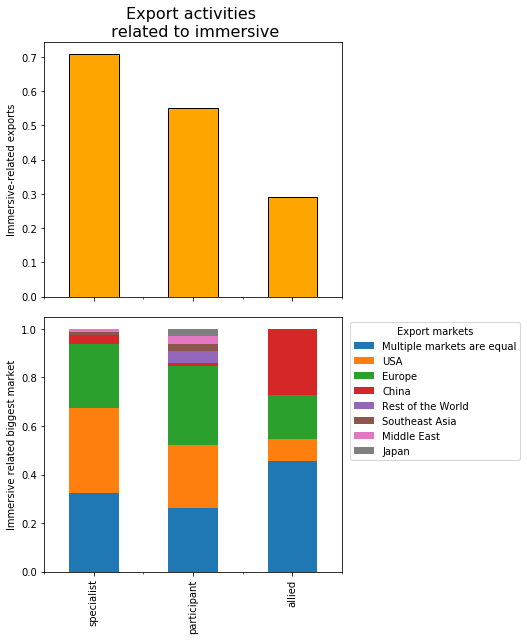

In [2056]:
#Exports

fig,ax = plt.subplots(figsize=(5,9),nrows=2,sharex=True)

pd.crosstab(mtm.function,mtm.q8_immersive_export,normalize=0).loc[function_order,'Yes'].plot.bar(
    color='orange',edgecolor=['black']*3,ax=ax[0])

ax[0].set_title('Export activities \n related to immersive',size=16)
ax[0].set_ylabel('Immersive-related exports')


biggest_markets= mtm.q9_export_market.value_counts().sort_values(ascending=False).index

pd.crosstab(mtm.function,mtm.q9_export_market,normalize=0).loc[function_order,
                                                               biggest_markets].plot.bar(stacked=True,ax=ax[1])

ax[1].set_ylabel('Immersive related biggest market')

ax[1].legend(bbox_to_anchor=(1.01,1),title='Export markets')

ax[1].set_xlabel('')

save_fig('immersive_exports')



### Place

Includes

* Local advantages
* Local barriers

In [2151]:
mtm_spec_part = mtm.loc[[x in ['specialist','participant'] for x in mtm.function],:]

top_respondents = mtm_spec_part['ttwa_name'].value_counts()[:12].index

In [2088]:
#What is the biggest local advantage?
factors_ordered = process_question(mtm_spec_part,'q10','likert')[1].sum().sort_values(ascending=False).index

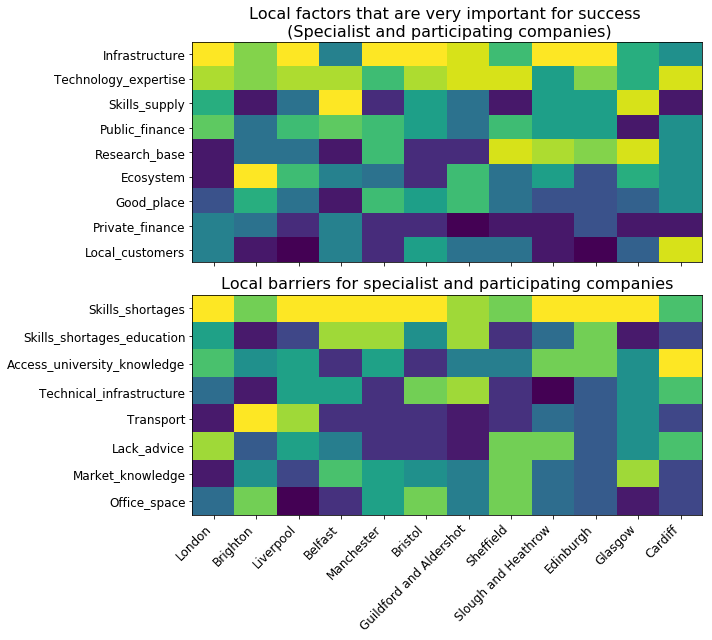

In [2153]:
#Process advantages
local_advantages = pd.concat([process_question(
    mtm_spec_part.loc[mtm_spec_part.ttwa_name==x,:],
    'q10','likert')[1].mean() for x in top_respondents],axis=1).loc[factors_ordered]

local_advantages.columns=top_respondents

#Process barriers

barriers = process_question(mtm_spec_part,'q14')[1].sum().sort_values(ascending=False)

local_barrier_vars = ['q14_barriers_skills_shortages','q14_barriers_skills_shortages_education',
                 'q14_barriers_access_university_knowledge','q14_barriers_technical_infrastructure',
                 'q14_barriers_transport','q14_barriers_lack_advice','q14_barriers_market_knowledge',
                 'q14_barriers_office_space']

local_barriers = pd.concat([process_question(
    mtm_spec_part.loc[mtm_spec_part.ttwa_name==x,:],
    'q14','binary')[1].mean() for x in top_respondents],axis=1).loc[local_barrier_vars]

local_barriers.columns=top_respondents


fig,ax = plt.subplots(figsize=(10,9),nrows=2,sharex=True)

#First plot
mat_1 = ax[0].imshow(local_advantages.rank(axis=0),aspect='auto')

#Y axis
ax[0].set_yticks(np.arange(len(local_advantages)))
ax[0].set_yticklabels([x[18:].capitalize() for x in local_advantages.index],size=12)

#X axis
ax[0].set_xticks(np.arange(len(local_advantages.columns)))
ax[0].set_xticklabels([x for x in local_advantages.columns],rotation=45,ha='right',size=12)

#Second plot
mat_2 = ax[1].imshow(local_barriers.rank(axis=0),aspect='auto')

#Y axis
ax[1].set_yticks(np.arange(len(local_barriers)))
ax[1].set_yticklabels([x[13:].capitalize() for x in local_barriers.index],size=12)

#X axis
ax[1].set_xticks(np.arange(len(local_barriers.columns)))
ax[1].set_xticklabels([x for x in local_barriers.columns],rotation=45,ha='right',size=12)

#Titles
ax[0].set_title('Local factors that are very important for success \n (Specialist and participating companies)',size=16)
ax[1].set_title('Local barriers for specialist and participating companies',size=16)

save_fig('local_drivers_barriers')

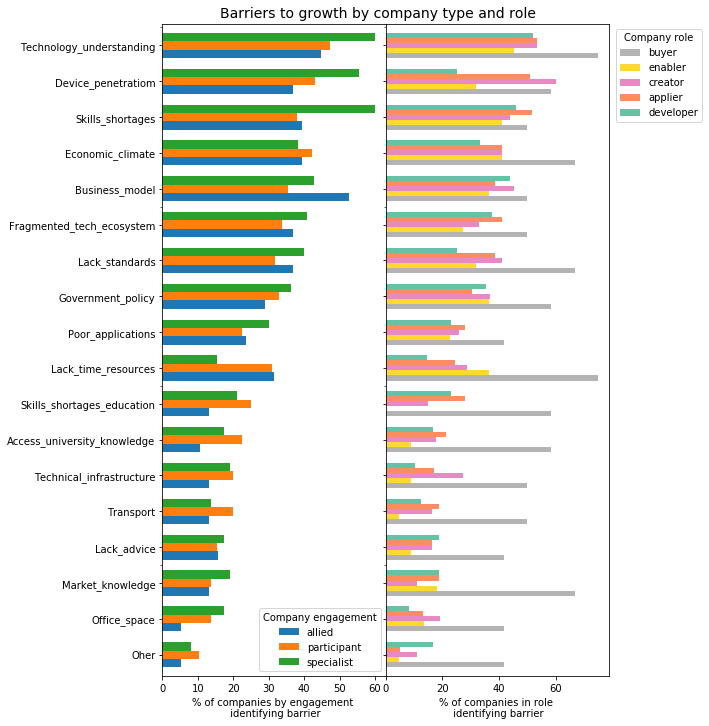

In [2204]:
#Now visualise all barriers by company type and function.

#Sources of value
barrier_function = pd.concat([100*process_question(
    mtm.loc[mtm.function==x,:],
    'q14_',var_type='binary')[1].mean() for x in ['allied','participant','specialist']],axis=1).loc[barriers.index[::-1]]
#Add columns
barrier_function.columns = ['allied','participant','specialist']

#Barriers
barrier_class = pd.concat([100*process_question(
    mtm.loc[mtm.classification==x,:],'q14_',var_type='binary')[1].mean() for x in role_order[::-1]],axis=1).loc[
    barriers.index[::-1]]

barrier_class.columns = role_order[::-1]



fig,ax = plt.subplots(figsize=(8,12),ncols=2,sharey=True)

barrier_function.plot.barh(ax=ax[0],width=0.7)
barrier_class.plot.barh(ax=ax[1],cmap='Set2_r',width=0.7)

ax[0].legend(title='Company engagement')
ax[1].legend(bbox_to_anchor=(1.01,1),title='Company role')

ax[1].set_yticklabels([x[13:].capitalize() for x in barrier_function.index],size=14
                      #rotation=45,ha='right'
                     )

ax[0].set_xlabel('% of companies by engagement \n identifying barrier')
ax[1].set_xlabel('% of companies in role \n identifying barrier')

plt.subplots_adjust(wspace=0)

fig.suptitle('Barriers to growth by company type and role',size=14,y=0.9)

plt.savefig(fig_path+'/{date}_business_barriers.pdf'.format(date=today_str),bbox_inches='tight')

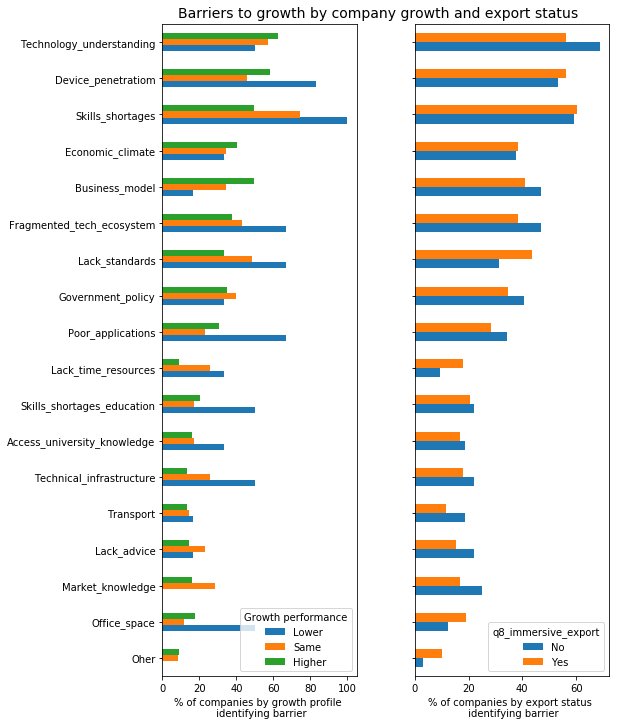

In [2255]:
#Links between barriers to growth and compamy types (growers / exporters)

#NEED to turn these into functions
#Gnarly way to run a processed question vs a categorical question
barrier_growth = 100*pd.concat([pd.crosstab(
    mtm_spec.q20_growth,
    process_question(mtm_spec,'q14_',var_type='binary')[1][x],normalize=0)[1] for x in
                            [x for x in mtm_spec.columns if 'q14_' in x]],axis=1)

#Again
barrier_export = 100*pd.concat([pd.crosstab(
    mtm_spec.q8_immersive_export,
    process_question(mtm_spec,'q14_',var_type='binary')[1][x],normalize=0)[1] for x in
                            [x for x in mtm_spec.columns if 'q14_' in x]],axis=1)

barrier_growth.columns = [x for x in mtm_spec.columns if 'q14_' in x]
barrier_export.columns = [x for x in mtm_spec.columns if 'q14_' in x]



fig,ax = plt.subplots(figsize=(8,12),ncols=2,sharey=True)

barrier_growth.T.loc[barriers.index[::-1]].iloc[:,[1,2,0]].plot.barh(ax=ax[0])


barrier_export.T.loc[barriers.index[::-1]].plot.barh(ax=ax[1])

#Legends
ax[0].legend(labels = [x.split(' ')[0] if 'same' not in x else 'Same' for x in barrier_growth.index[[1,2,0]]],
             title='Growth performance')
#ax[1].legend(bbox_to_anchor=(1.01,1),title='Exporting company')



ax[1].set_yticklabels([x[13:].capitalize() for x in barrier_function.index],size=14
                      #rotation=45,ha='right'
                     )

ax[0].set_xlabel('% of companies by growth profile \n identifying barrier')
ax[1].set_xlabel('% of companies by export status \n identifying barrier')

plt.subplots_adjust(wspace=0.3)

fig.suptitle('Barriers to growth by company growth and export status',size=14,y=0.9)

plt.savefig(fig_path+'/{date}_business_barriers_growth.pdf'.format(date=today_str),bbox_inches='tight')

### Access to support

In [2291]:
def plot_access_support(variable,title,var_cut):
    '''
    Plots access to support by variable
    
    '''
    #Totals (for ordering)
    totals =process_question(mtm,variable,var_type='likert',var_int='Received')[1].sum()
    totals_order = totals.sort_values(ascending=False).index
    
    
    #Sources of value
    access_function = pd.concat([100*process_question(
        mtm.loc[mtm.function==x,:],
        variable,var_type='likert',var_int='Received')[1].mean() for x in ['allied','participant','specialist']],
                                axis=1).loc[totals_order[::-1]]
    #Add columns
    access_function.columns = ['allied','participant','specialist']

    #Barriers
    access_class = pd.concat([100*process_question(
        mtm_spec.loc[mtm_spec.classification==x,:],variable,
        var_type='likert',var_int='Received')[1].mean() for x in role_order[::-1]],axis=1).loc[
        totals_order[::-1]]

    access_class.columns = role_order[::-1]


    fig,ax = plt.subplots(figsize=(8,12),ncols=2,sharey=True)

    access_function.plot.barh(ax=ax[0],width=0.7)
    access_class.plot.barh(ax=ax[1],cmap='Set2_r',width=0.7)

    ax[0].legend(title='Company engagement')
    ax[1].legend(bbox_to_anchor=(1.01,1),title='Company role')

    ax[1].set_yticklabels([x[var_cut:].capitalize() for x in totals.index],size=14
                          #rotation=45,ha='right'
                         )

    ax[0].set_xlabel('% of companies by engagement \n accessing support')
    ax[1].set_xlabel('% of specialist companies in role \n accessing support')

    plt.subplots_adjust(wspace=0)

    fig.suptitle('Access to {name} by company type and role'.format(name=title),size=14,y=0.9)

    #return(ax)
    
plt.savefig(fig_path+'/{date}_access_to_support.pdf'.format(date=today_str),bbox_inches='tight')

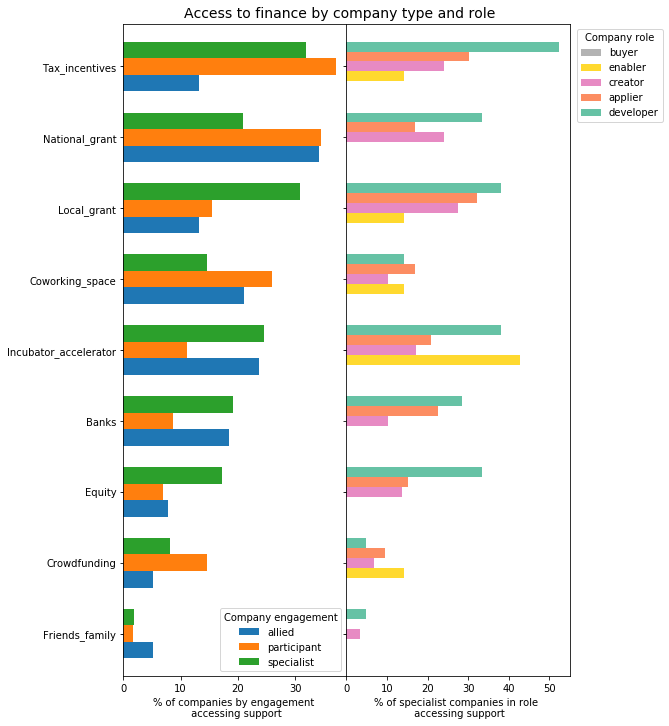

In [2292]:
plot_access_support('q12_','finance',var_cut=12)
plt.savefig(fig_path+'/{date}_access_to_support.pdf'.format(date=today_str),bbox_inches='tight')

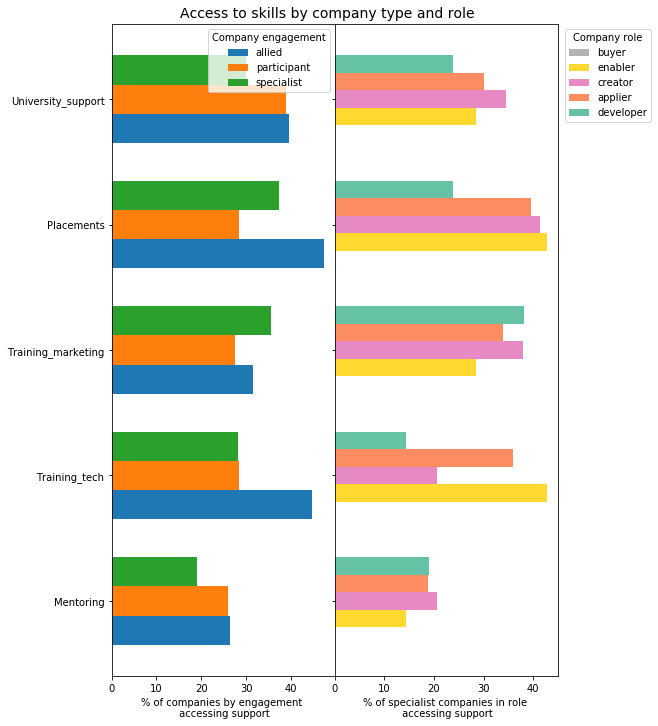

In [2293]:
plot_access_support('q13_','skills',var_cut=18)
plt.savefig(fig_path+'/{date}_access_to_support_skills.pdf'.format(date=today_str),bbox_inches='tight')

### Meetup analysis

In [2428]:
from gensim.models.word2vec import Word2Vec
from geopandas.geoseries import *


In [2380]:
#Load the data
with open(ext_data+'/meetup_groups.json','r') as infile:
    groups = json.load(infile)
    
#Load the data
with open(ext_data+'/meetup_groups_members.json','r') as infile:
    members = json.load(infile)
    
    
#Focus on UK groups
uk = [x for x in groups if x['country']=='GB']

print(len(uk))

print(np.sum([x['members'] for x in uk]))


#There are 1.4m people here. Let's look for the ones in Mexican groups
#This is a list of group ids
uk_groups_ids = set([x['id'] for x in uk])

#Extract users with mexican ids
uk_users = [x for x in members if x['group_id'] in uk_groups_ids]


#Create group membership lists
#First we create a container for members
group_memberships = {x:[] for x in set([x['group_id'] for x in uk_users])} 

#Then we go through each member and append them to each group
for user in uk_users:
    group_memberships[user['group_id']].append(user['member_id'])

7278
5562226.0


In [2381]:
keyword_list = {x['id']:[top['urlkey'] for top in x['topics']] for x in uk}

model = Word2Vec([x for x in keyword_list.values()])

print(model.most_similar('virtual-reality',topn=20))
print('\n')
print(model.most_similar('augmented-reality',topn=20))
print('\n')
print(model.most_similar('hololens',topn=20))

[('augmented-reality', 0.9982846975326538), ('embedded-systems', 0.9975425004959106), ('apis', 0.9960314035415649), ('whitehat', 0.9954541921615601), ('3d-printing', 0.9949050545692444), ('hardware', 0.9948940277099609), ('makerspaces', 0.9944884777069092), ('google-developer-group', 0.9941950440406799), ('coders', 0.99342942237854), ('microcontroller', 0.993195116519928), ('hardware-engineering', 0.9928795099258423), ('web-application-development', 0.9926903247833252), ('diy', 0.9922537803649902), ('high-performance-computing', 0.9915938377380371), ('voip', 0.9912095665931702), ('it-professionals', 0.9908546805381775), ('smart-home', 0.9905399084091187), ('raspberry-pi', 0.9905279278755188), ('social-coding', 0.9901800155639648), ('google-technology-user-group', 0.9899212121963501)]


[('virtual-reality', 0.9982845783233643), ('embedded-systems', 0.9955152869224548), ('makerspaces', 0.9943089485168457), ('apis', 0.9937926530838013), ('whitehat', 0.9928887486457825), ('3d-printing', 0.

In [2379]:
#Find immersive groups
imm_ids = [k for k,v in keyword_list.items() if any(x in v for x in ['virtual-reality','augmented-reality','mixed_reality'])]

imm_groups = [x for x in uk if x['id'] in imm_ids]

In [2384]:
#Activity trends
#Key variables for the dataframe
uk_df = pd.concat([pd.DataFrame({'name':x['name'],
                                        'city':x['city'],
                                        'created':x['created'],
                                        'lat':x['lat'],
                                        'lon':x['lon']},
                                       index=[x['id']]) for x in uk]).reset_index(drop=False)

#Add a list with topics
uk_df['keyword_list'] = [[top['urlkey'] for top in x['topics']] for x in uk]


#Add the list of members
uk_df['member_list'] = [group_memberships[x] if x in group_memberships.keys() else [] 
                                for x in uk_df['index']]

uk_df['member_n'] = [len(x) for x in uk_df['member_list']]

#And now get the year the meetup was created from the timestamp. NB we divide by 1000 to go from miliseconds
#to seconds
uk_df['year'] = [datetime.datetime.fromtimestamp(x/1000).year for x in uk_df['created']]

uk_df['imm'] = [x in imm_ids for x in uk_df['index']]

#What does it look like?
uk_df.head()


,index,city,created,lat,lon,name,keyword_list,member_list,member_n,year,imm
0,22021080.0,London,1.485041e+12,51.53,-0.08,CAIDI: Cognitive & AI Data Infrastructure,"[ai, opensource, databasepro, softwaredev, dat...","[142610, 1821827, 2135982, 2146089, 2923961, 3...",893,2017,False
1,19609115.0,London,1.456165e+12,51.51,-0.14,1 Day Start-Up,"[socialnetwork, sealliance, young-professional...","[111454452, 140668892, 192632476, 198601146, 1...",6,2016,False
2,12924892.0,London,1.392651e+12,51.52,-0.09,10 Digital Ladies,"[innovation, witi, entrepreneurship, womens-bu...","[9645122, 11290712, 14639412, 22445461, 306112...",11,2014,False
3,1674178.0,London,1.278937e+12,51.50,-0.25,The 1000 Books Book Club (Chiswick),"[bookclub, chiswick-social-club, literature, r...","[10172200, 61938382]",2,2010,False
4,9102182.0,Stevenage,1.372262e+12,51.92,-0.17,1001 Things to do before you die,"[socialnetwork, international-travel, excercis...","[28146792, 78201952, 183588811, 189925021, 202...",5,2013,False


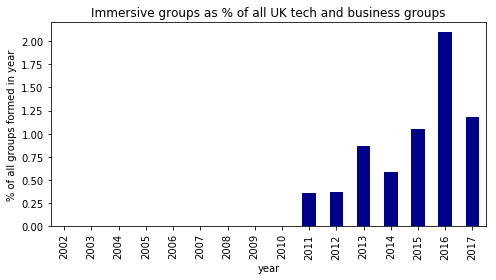

In [2406]:
#Plot activity
fig,ax = plt.subplots(figsize=(7,4))

imm_activity = pd.crosstab(uk_df.year,uk_df.imm,normalize=0).apply(lambda x: 100*x/x.sum(),axis=1)[True]
imm_activity.plot.bar(color='darkblue',ax=ax)

ax.set_title('Immersive groups as % of all UK tech and business groups')
ax.set_ylabel('% of all groups formed in year')

save_fig('immersive_meetups')

In [2411]:
uk_df.groupby('imm')['member_list'].apply(lambda x: len(set([val for el in x for val in el])))

imm
False    242260
True       3899
Name: member_list, dtype: int64

In [2421]:
#Top 10 locations
uk_df.loc[uk_df['imm']==True,:].sort_values('member_n',ascending=False)[['name','city','member_n']][:10]

,name,city,member_n
2460,Game AI Meetup (GAIM) of London,London,357
4811,Mixed Reality London,London,217
924,Burnley Innovative Technology (BIT) Meetup,Burnley,216
5521,QA for VR/MR/AR Meetup,London,205
6036,SouthWest VR,Bristol,201
6251,SWARVR – South West AR / VR,Bristol,172
2995,Investors in VR,London,167
1076,Cambridge Virtual Reality Meetup,Cambridge,155
4810,Mixed Reality Experience Playground - London,Greater London,154
3878,London MMO Developers,London,153


In [2464]:
#TTWA poly_2

ttwa_reproject = ttwa_shp.copy()

ttwa_reproject.crs

ttwa_wgs = ttwa_reproject.to_crs(epsg=4326)

In [2462]:
# Geocode

def point_in_poly(point,poly):
    '''
    This function checks if a point is inside a polygon and returns the result
    
    
    '''
    
    result = poly.contains(point)
    
    return(result)

#Everything

#ttwa_poly.reset_index(drop=False,inplace=True)

#This turns each meetup lat/lon into a geographical point we can search for in a polygon
meetup_geo_points = [(x['id'],Point(x['lon'],x['lat'])) for x in uk]

#This container stores the states
cont = []

for point in [x[1] for x in meetup_geo_points]:
    
    #Applies the function above
    result = [point_in_poly(point,ttwa_wgs.loc[num,'geometry']) for num in np.arange(len(ttwa_wgs))]
    
    #Finds the state name that contains the point
    try:
        name = [x for x,y in zip(ttwa_wgs['TTWA11NM'],result) if y==True][0]
    
    #We had a problem with one of them
    except:
        name = np.nan
    
    #Returns all contents
    cont.append(name)


In [2465]:
uk_df['ttwa_name'] = cont

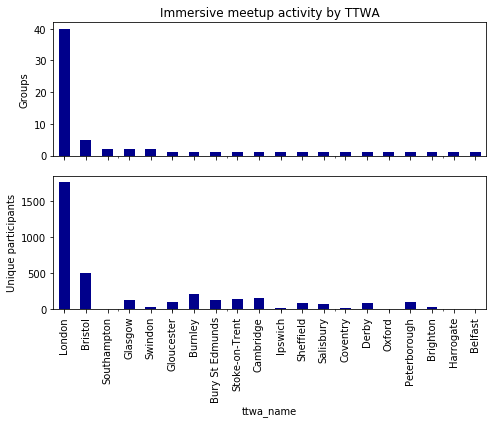

In [2497]:

#Top 15 places.

top_15_places = pd.crosstab(uk_df['ttwa_name'],uk_df['imm']).sort_values(True,ascending=False)[True][:20]

top_15_empl = uk_df.loc[uk_df.imm==True].groupby('ttwa_name')['member_list'].apply(
    lambda x: len(set([val for el in x for val in el])))[top_15_places.index]


fig,ax = plt.subplots(figsize=(7,6),nrows=2,sharex=True)


top_15_places.plot.bar(color='darkblue',ax=ax[0])
top_15_empl.plot.bar(color='darkblue',ax=ax[1])


ax[0].set_ylabel('Groups')
ax[1].set_ylabel('Unique participants')

ax[0].set_title('Immersive meetup activity by TTWA')


save_fig('meetup_places')


In [2499]:
uk_df.loc[uk_df.imm==True].groupby('ttwa_name')['member_list'].apply(
    lambda x: len(set([val for el in x for val in el]))).sort_values(ascending=False)

ttwa_name
London             1760
Bristol             506
Burnley             216
Cambridge           155
Stoke-on-Trent      145
Glasgow             133
Bury St Edmunds     120
King's Lynn         112
Peterborough        102
Birmingham           96
Gloucester           96
Dundee               95
Derby                81
Sheffield            80
Salisbury            76
Huntingdon           58
Wisbech              51
Luton                45
Brighton             35
Swindon              25
Ipswich              14
Manchester           11
Coventry             10
Leicester             8
Oxford                7
Belfast               7
Liverpool             4
Southampton           3
Harrogate             2
Leeds                 1
Name: member_list, dtype: int64

In [2504]:
uk_df.loc[(uk_df.imm==True) & (uk_df.ttwa_name=='Peterborough')]

,index,city,created,lat,lon,name,keyword_list,member_list,member_n,year,imm,ttwa_name
5294,23231594.0,Peterborough,1.491836e+12,52.59,-0.25,in_collusion: Peterborough arts & technology m...,"[ai, innovation, newtech, technology, big-data...","[11847323, 15787571, 17905611, 39662412, 49602...",102,2017,True,Peterborough


In [2506]:
5000/400

12.5